# Section A

### ML Homework 2 | 207850074 | 211624796

# Section A - Data Exploration & Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data in temporary DataFrames for us to investigate
results_df = pd.read_csv('results.csv')
shootouts_df = pd.read_csv('shootouts.csv')
goalscorers_df = pd.read_csv('goalscorers.csv')

**Function that will help us gets statistics insights about missing values and ideas of later dropping or imputations**

In [3]:
def analyze_dataset(df):
    # Display the initial shape and basic information of the data
    print(f"\nInitial shape of dataset: {df.shape}\n")
    print(df.info())
    
    # Display the percentage of missing data per column
    missing_data = df.isnull().mean() * 100
    print("\nPercentage of missing data per column:")
    print(missing_data)

    # Identify columns to drop based on a threshold of missing data
    drop_columns = missing_data[missing_data > 30].index.tolist()
    if drop_columns:
        print(f"\nColumns to drop due to high missing values percentage: {drop_columns}")
    else:
        print("\nNo columns to drop due to missing value percentage.")

    # Identify columns to impute based on missing data
    impute_columns = missing_data[(missing_data > 0) & (missing_data <= 30)].index.tolist()
    if impute_columns:
        print(f"\nColumns that might need some imputation: {impute_columns}")
    else:
        print("\nNo columns need imputation.")

In [4]:
analyze_dataset(results_df)


Initial shape of dataset: (47325, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47325 entries, 0 to 47324
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        47325 non-null  object 
 1   home_team   47310 non-null  object 
 2   away_team   47310 non-null  object 
 3   home_score  47267 non-null  float64
 4   away_score  47267 non-null  float64
 5   tournament  47325 non-null  object 
 6   city        47325 non-null  object 
 7   country     47325 non-null  object 
 8   neutral     47325 non-null  bool   
dtypes: bool(1), float64(2), object(6)
memory usage: 2.9+ MB
None

Percentage of missing data per column:
date          0.000000
home_team     0.031696
away_team     0.031696
home_score    0.122557
away_score    0.122557
tournament    0.000000
city          0.000000
country       0.000000
neutral       0.000000
dtype: float64

No columns to drop due to missing value percentage.

Columns that might n

**Columns that might need some imputation or drop:** ['home_score', 'away_score','home_team','away_team']

In [5]:
analyze_dataset(goalscorers_df)


Initial shape of dataset: (44129, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44129 entries, 0 to 44128
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44129 non-null  object 
 1   home_team  44129 non-null  object 
 2   away_team  44129 non-null  object 
 3   team       44129 non-null  object 
 4   scorer     44080 non-null  object 
 5   minute     43870 non-null  float64
 6   own_goal   44129 non-null  bool   
 7   penalty    44129 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.1+ MB
None

Percentage of missing data per column:
date         0.000000
home_team    0.000000
away_team    0.000000
team         0.000000
scorer       0.111038
minute       0.586916
own_goal     0.000000
penalty      0.000000
dtype: float64

No columns to drop due to missing value percentage.

Columns that might need some imputation: ['scorer', 'minute']


**Columns that might need some imputation:** ['scorer', 'minute']

In [6]:
analyze_dataset(shootouts_df)


Initial shape of dataset: (637, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           637 non-null    object
 1   home_team      637 non-null    object
 2   away_team      637 non-null    object
 3   winner         637 non-null    object
 4   first_shooter  223 non-null    object
dtypes: object(5)
memory usage: 25.0+ KB
None

Percentage of missing data per column:
date              0.000000
home_team         0.000000
away_team         0.000000
winner            0.000000
first_shooter    64.992151
dtype: float64

Columns to drop due to high missing values percentage: ['first_shooter']

No columns need imputation.


**Columns to drop due to high missing values percentage:** ['first_shooter']

**NOTE**: We want to use all rows in dataset to decide winning in case of a draw so we need this info, we will consider dropping 'first_shooter' feature column as it seems irrelavant ~ 400 missing values from ~ 600 data rows!

## "Results" Dataset Analysis:


Summary Statistics - Results:
         home_score    away_score
count  47267.000000  47267.000000
mean       1.760827      1.183490
std        1.775940      1.402493
min        0.000000      0.000000
25%        1.000000      0.000000
50%        1.000000      1.000000
75%        2.000000      2.000000
max       31.000000     21.000000


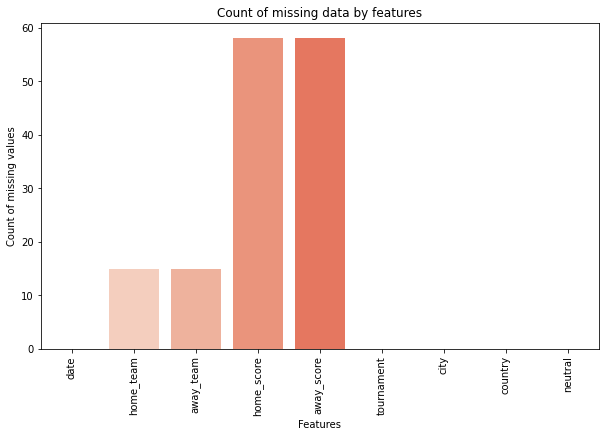

In [7]:
print("\nSummary Statistics - Results:")
print(results_df.describe())
missing_values_count = results_df.isnull().sum()
plt.figure(figsize=(10,6))
sns.barplot(x=missing_values_count.index, y=missing_values_count.values, palette="Reds")
plt.title('Count of missing data by features')
plt.ylabel('Count of missing values')
plt.xlabel('Features')
plt.xticks(rotation='vertical')
plt.show()

In [8]:
# Python cell
na_scores_df = results_df[results_df['home_score'].isnull() & results_df['away_score'].isnull()& results_df['away_team'].isnull()]
na_scores_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
47310,2024-06-29,NaN,NaN,NaN,NaN,UEFA Euro,Berlin,Germany,True
47311,2024-06-29,NaN,NaN,NaN,NaN,UEFA Euro,Dortmund,Germany,True
47312,2024-06-30,NaN,NaN,NaN,NaN,UEFA Euro,Gelsenkirchen,Germany,True
47313,2024-06-30,NaN,NaN,NaN,NaN,UEFA Euro,Cologne,Germany,True
47314,2024-07-01,NaN,NaN,NaN,NaN,UEFA Euro,Düsseldorf,Germany,True


### Missing Values in Results:
home_team 15
away_team 15
home_score 58
away_score 58
###  Missing Values are for future matches that haven't yet occurred -> We will ignore them later on !

## "Shootouts" Dataset Analysis:


Summary Statistics - Shootouts:
              date     home_team away_team       winner first_shooter
count          637           637       637          637           223
unique         562           180       189          175            85
top     2024-03-26  South Africa     Egypt  South Korea      Colombia
freq             5            18        15           15            11


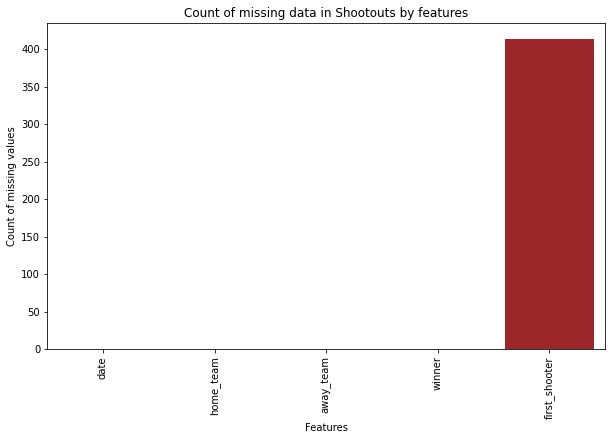

In [9]:
# Python modified cell
print("\nSummary Statistics - Shootouts:")
print(shootouts_df.describe())
missing_values_count = shootouts_df.isnull().sum()
plt.figure(figsize=(10,6))
sns.barplot(x=missing_values_count.index, y=missing_values_count.values, palette="Reds")
plt.title('Count of missing data in Shootouts by features')
plt.ylabel('Count of missing values')
plt.xlabel('Features')
plt.xticks(rotation='vertical')
plt.show()

### Missing Values - Shootouts:
first_shooter    414

## "Goalscorers" Dataset Analysis:


Summary Statistics - Goalscorers:
             minute
count  43870.000000
mean      50.010372
std       26.346979
min        1.000000
25%       28.000000
50%       51.000000
75%       73.000000
max      122.000000


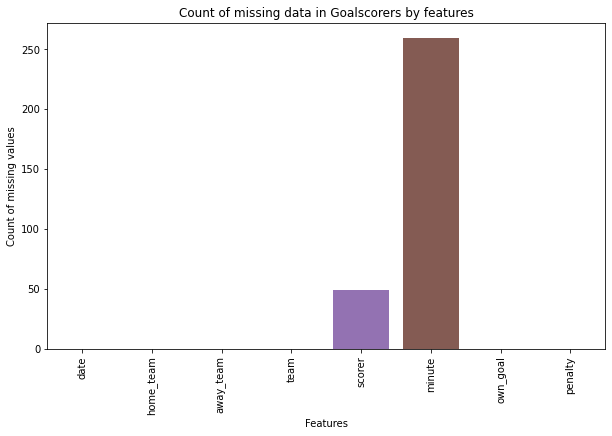

In [10]:
print("\nSummary Statistics - Goalscorers:")
print(goalscorers_df.describe())
missing_values_count = goalscorers_df.isnull().sum()
plt.figure(figsize=(10,6))
sns.barplot(x=missing_values_count.index, y=missing_values_count.values, palette="tab10")
plt.title('Count of missing data in Goalscorers by features')
plt.ylabel('Count of missing values')
plt.xlabel('Features')
plt.xticks(rotation='vertical')
plt.show()

### Missing Values - GoalScorers:
scorer        49
minute       259

# Data Visualization and Correlations

## Goals, Shootouts and distribution

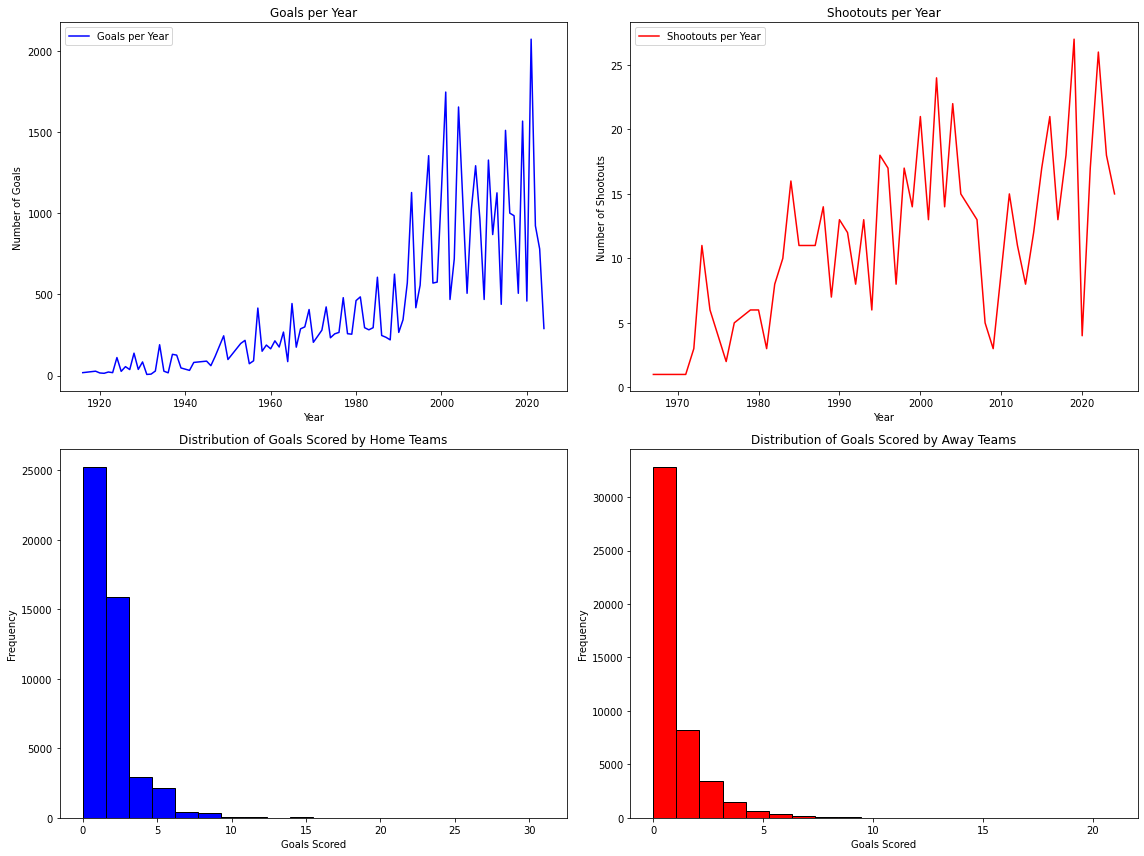

In [11]:

import matplotlib.pyplot as plt
# Calculate goals per year
goalscorers_df['date'] = pd.to_datetime(goalscorers_df['date'])
goalscorers_df['year'] = goalscorers_df['date'].dt.year
goals_per_year = goalscorers_df.groupby('year').size()

# Calculate shootouts per year
shootouts_df['date'] = pd.to_datetime(shootouts_df['date'])
shootouts_df['year'] = shootouts_df['date'].dt.year
shootouts_per_year = shootouts_df.groupby('year').size()


# Plotting the data with 2 rows and 2 columns layout
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Goals per year
axes[0, 0].plot(goals_per_year.index, goals_per_year.values, label='Goals per Year', color='b')
axes[0, 0].set_title('Goals per Year')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Number of Goals')
axes[0, 0].legend()

# Shootouts per year
axes[0, 1].plot(shootouts_per_year.index, shootouts_per_year.values, label='Shootouts per Year', color='r')
axes[0, 1].set_title('Shootouts per Year')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Number of Shootouts')
axes[0, 1].legend()

# Distribution of Goals Scored by Home Teams
axes[1, 0].hist(results_df['home_score'], bins=20, color='blue', edgecolor='black')
axes[1, 0].set_title('Distribution of Goals Scored by Home Teams')
axes[1, 0].set_xlabel('Goals Scored')
axes[1, 0].set_ylabel('Frequency')

# Distribution of Goals Scored by Away Teams
axes[1, 1].hist(results_df['away_score'], bins=20, color='red', edgecolor='black')
axes[1, 1].set_title('Distribution of Goals Scored by Away Teams')
axes[1, 1].set_xlabel('Goals Scored')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Key Observations
### Goals per Year
The number of goals scored annually shows an increasing trend over time, with noticeable spikes in certain periods. This could be due to factors such as the number of matches played, changes in game strategies, or improvements in player performance.
### Shootouts per Year
The frequency of penalty shootouts has increased over time, particularly since the 1970s. This could be due to the introduction of penalty shootouts to resolve ties in knockout stages of tournaments.
#### When goals per year spike, shootouts per year tend to decrease, and vice versa.
This **inverse relationship** suggests that in years with higher goal scoring, matches are more likely to be resolved in regular time, leading to fewer shootouts.
Conversely, in years with fewer goals, more matches may remain unresolved, leading to an increase in shootouts.
### Distribution of Goals Scored by Home Teams
The distribution of goals scored by home teams is slightly skewed towards the lower end, with most home teams scoring between 0 and 3 goals per match. There are occasional instances of higher scores.
### Distribution of Goals Scored by Away Teams
Similar to home teams, away teams also predominantly score between 0 and 3 goals per match. **However, the frequency of higher scores is even lower compared to home teams, indicating a possible home advantage in scoring.**

## Visualizing the Impact of Location:
## Home Games on Home Team Victory & Neutral Games Winners

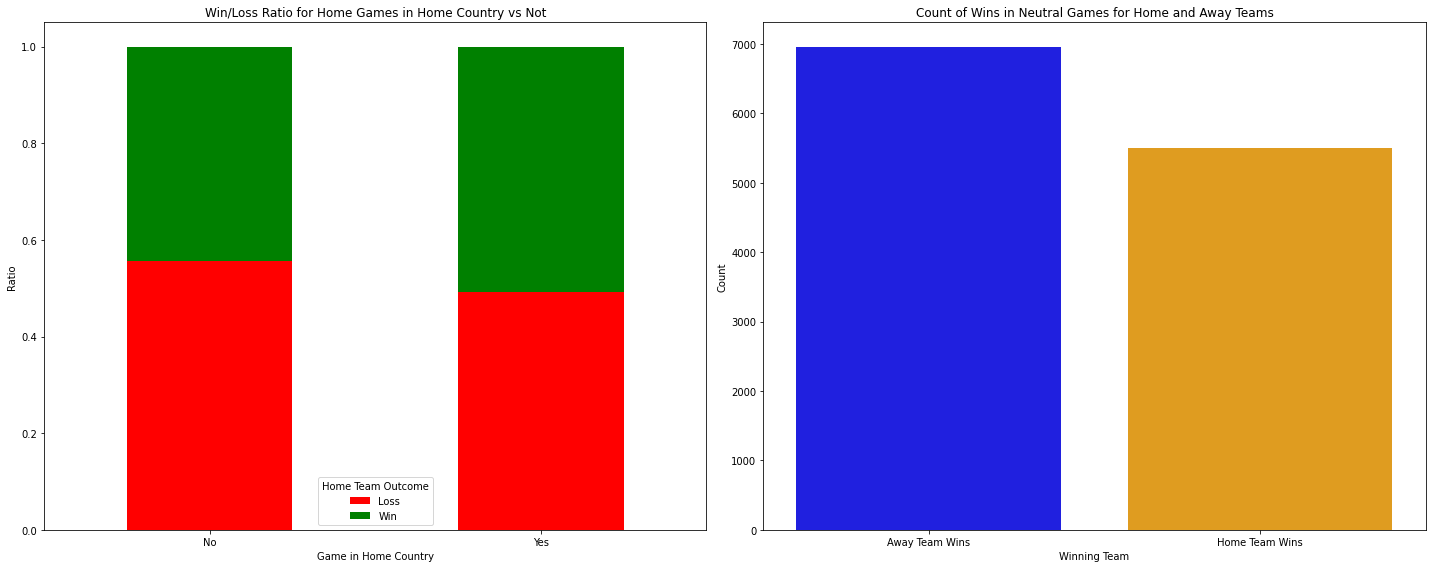

In [12]:

# Determine if the game took place in the home team's country
results_df['game_in_home_country'] = results_df['country'] == results_df['home_team']

# Determine if the home team won
results_df['home_team_won'] = results_df['home_score'] > results_df['away_score']

# Calculate the win/loss ratio for home games in home country vs not in home country
home_country_wins = results_df.groupby(['game_in_home_country', 'home_team_won']).size().unstack().fillna(0)
home_country_wins_ratio = home_country_wins.div(home_country_wins.sum(axis=1), axis=0)

# Create the plots side by side
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Plot the win/loss ratio for home games in home country vs not in home country
home_country_wins_ratio.plot(kind='bar', stacked=True, color=['red', 'green'], ax=ax[0])
ax[0].set_title('Win/Loss Ratio for Home Games in Home Country vs Not')
ax[0].set_xlabel('Game in Home Country')
ax[0].set_ylabel('Ratio')
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['No', 'Yes'], rotation=0)
ax[0].legend(['Loss', 'Win'], title='Home Team Outcome')

# Count the number of wins for home and away teams in neutral games
neutral_games = results_df[results_df['neutral'] == True]
neutral_games_wins = neutral_games.groupby(['home_team_won']).size().reset_index(name='count')
neutral_games_wins['team'] = ['Away Team Wins', 'Home Team Wins']

sns.barplot(data=neutral_games_wins, x='team', y='count', palette=['blue', 'orange'], ax=ax[1])
ax[1].set_title('Count of Wins in Neutral Games for Home and Away Teams')
ax[1].set_xlabel('Winning Team')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

| **Home country Games**                                                                 | **Neutral Games**                                                                        |
|---------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------|
|**Games Not in Home Country:**                                                | **Home Team Wins:**                           |
| Home teams have a lower win ratio and Tends to **lose more**                    |  Home teams win **less often in neutral games**.                                                                  |
|**Games in Home Country:**                                                     |  **Away Team Wins**:                                            |
| Home teams have a lower loss ratio and tend to **win more** by a bit            | Away teams win **more often in neutral games.**                                                                     |
| **Insight:**                                                                   | **Insight:**                                                                           |
| **Home teams are more likely to win when playing in their own country. However, The effect seems Minor** |**In neutral games, away teams tend to win more frequently than home teams**                                                                           |
|                                                                                 |                 |

# Visualize Top Scorers
## Top Players:

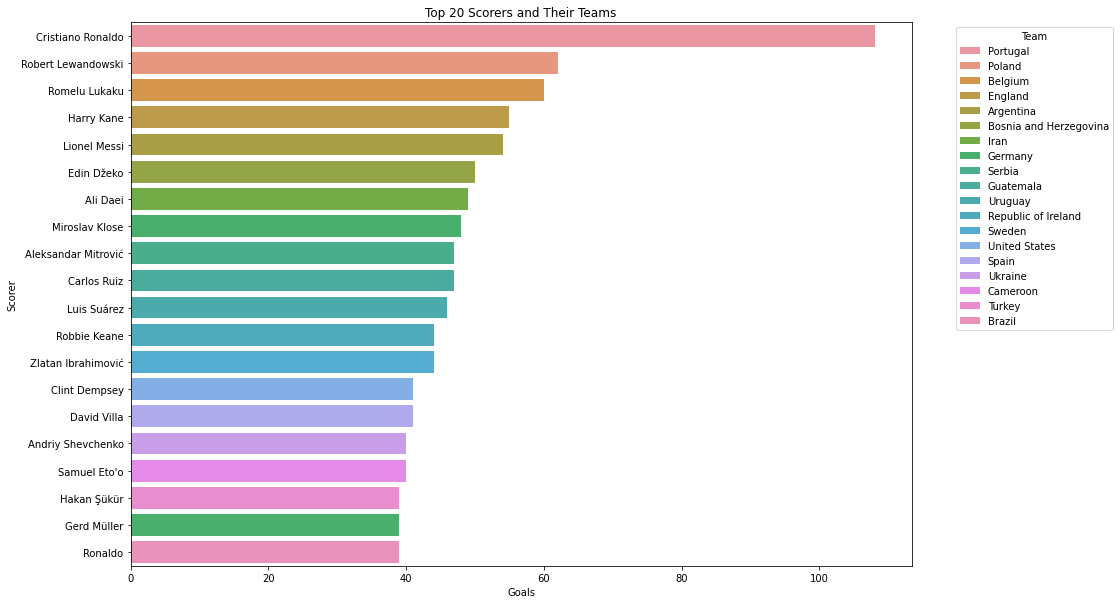

In [13]:
# Extract top 20 scorers from the goalscorers dataset
top_scorers_20 = goalscorers_df.groupby(['scorer', 'team']).size().reset_index(name='goals').sort_values(by='goals', ascending=False).head(20)

# Plot the top 20 scorers
plt.figure(figsize=(14, 10))
sns.barplot(data=top_scorers_20, x='goals', y='scorer', hue='team', dodge=False)
plt.title('Top 20 Scorers and Their Teams')
plt.xlabel('Goals')
plt.ylabel('Scorer')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Insights
The chart highlights the contribution of key players to their teams:

**Cristiano Ronaldo (Portugal)** is the leading scorer, significantly ahead of others.
**Robert Lewandowski (Poland)** and **Romelu Lukaku (Belgium)** also have high goal counts, showing their impact on their teams' performances.
Other notable scorers include **Harry Kane (England), Lionel Messi (Argentina), Edin Džeko (Bosnia and Herzegovina),** and **Ali Daei (Iran).**

The diversity of teams represented by top scorers, including players from **Guatemala (Carlos Ruiz), Uruguay (Luis Suárez)**, and **the Republic of Ireland (Robbie Keane)**, demonstrates the global nature of top football talent.

**This visualization provides insight into how individual player performances can significantly impact match outcomes, emphasizing the importance of key players in competitive tournaments.**

## Top Countries:

In [14]:
# Calculate total goals scored by each team as home team
home_goals = results_df.groupby('home_team')['home_score'].sum()

# Calculate total goals scored by each team as away team
away_goals = results_df.groupby('away_team')['away_score'].sum()

# Combine the totals for home and away games
total_goals = home_goals.add(away_goals, fill_value=0)

# Convert Series to DataFrame
total_goals_df = total_goals.reset_index()
total_goals_df.columns = ['team', 'total_goals']

# Display the result
total_goals_df

,team,total_goals
0,Abkhazia,51.0
1,Afghanistan,138.0
2,Albania,357.0
3,Alderney,73.0
4,Algeria,881.0
...,...,...
332,Zambia,1225.0
333,Zanzibar,187.0
334,Zimbabwe,639.0
335,Åland,4.0


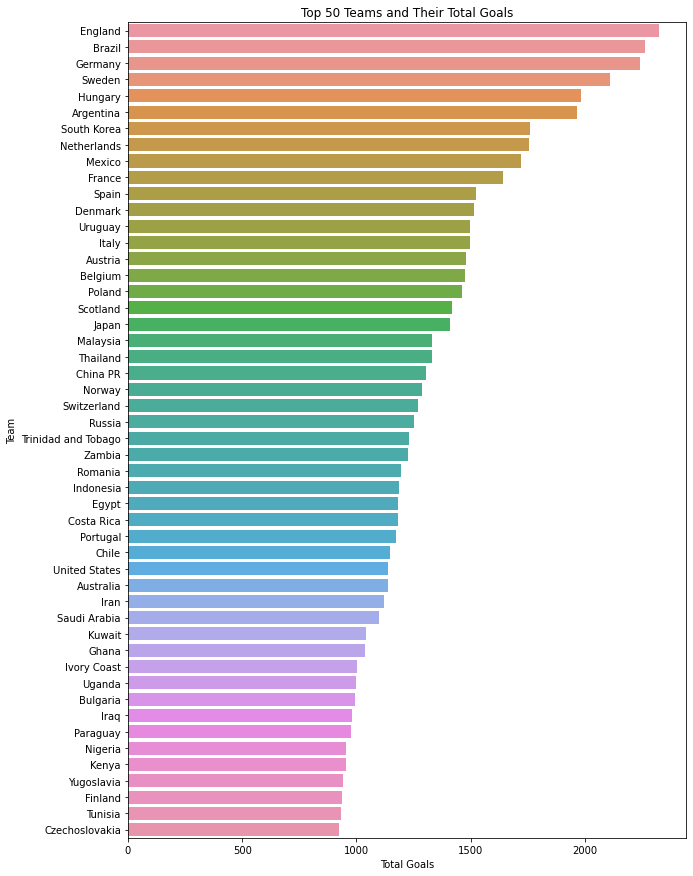

In [15]:
# Update total_goals_df
total_goals_df = total_goals_df.sort_values(by='total_goals', ascending=False)

# Selecting top 50 teams
top_50_teams_df = total_goals_df.head(50)

# Plotting the bar chart
plt.figure(figsize=(10,15))
sns.barplot(x='total_goals', y='team', data=top_50_teams_df)
plt.xlabel('Total Goals')
plt.ylabel('Team')
plt.title('Top 50 Teams and Their Total Goals')
plt.show()

we can infer that there are very strong countries that scored a lot. their strength/goals amount as a feature may indicate whether they won or not later on.

# Visualize Tournament type Impact
## We tried to visualize results based on each tournament type but there are too Many Labels

In [16]:
# Count the number of different labels in the 'tournament' column
unique_tournament_labels = results_df['tournament'].nunique()
print('tournament labels count:')
print(unique_tournament_labels)

tournament labels count:
175


**The results dataset contains a total of 175** different tournament labels, indicating a wide variety of tournaments represented in the data. Given the large number of unique tournaments, analyzing each one individually would be complex and potentially overwhelming. Therefore, we can **consider mapping these tournaments into broader categories based on geographical and organizational relevance at our data preparation part**

## So for now- we will display Top Tournaments types 
we have **46** "**significant tournaments**"—that appears 100 or more times 

## Visualize Average Scores for Home and Away Teams in Significant Tournaments

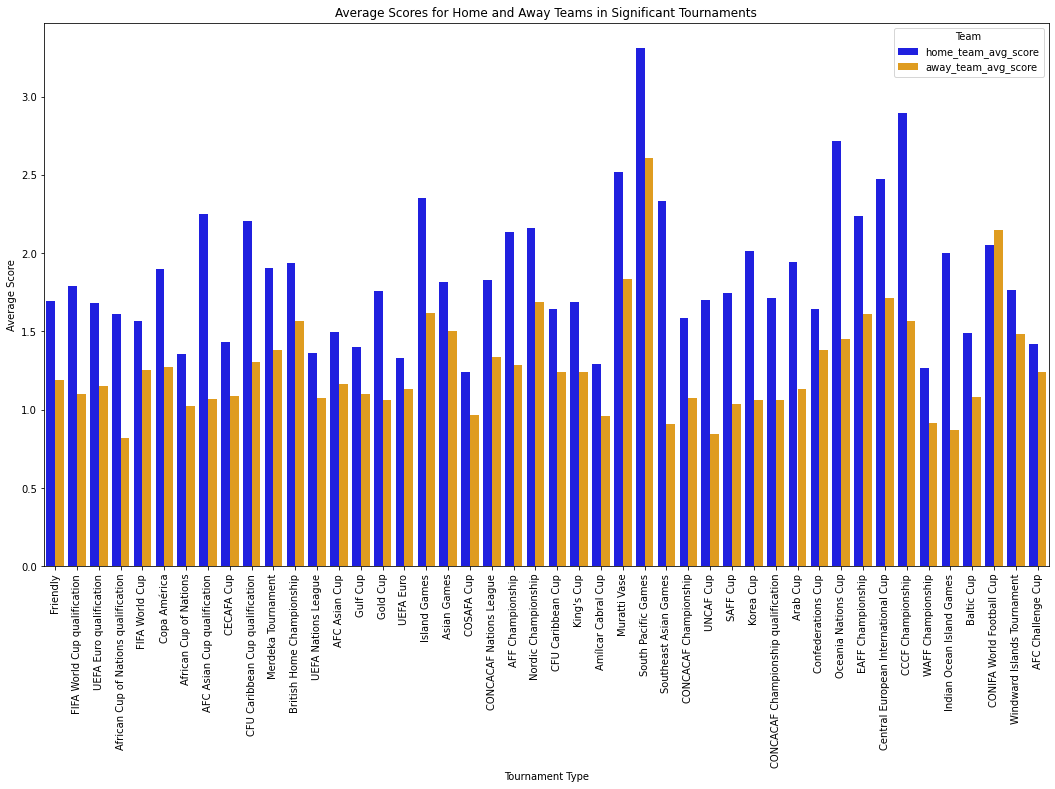

In [17]:
# Identify significant tournaments (appearing 100 or more times)
tournament_counts = results_df['tournament'].value_counts()
significant_tournaments = tournament_counts[tournament_counts >= 100].index

# Sort tournaments by their number of appearances
sorted_tournaments = tournament_counts[tournament_counts >= 100].sort_values(ascending=False).index

# Filter the results for significant tournaments and maintain the sorted order
significant_results_sorted = results_df[results_df['tournament'].isin(sorted_tournaments)].copy()
significant_results_sorted['tournament'] = pd.Categorical(significant_results_sorted['tournament'], categories=sorted_tournaments, ordered=True)

# Calculate average scores for home and away teams for each tournament type
average_scores_sorted = significant_results_sorted.groupby('tournament').agg(
    home_team_avg_score=('home_score', 'mean'),
    away_team_avg_score=('away_score', 'mean')
).reset_index()

# Plot the average scores for each tournament type with improved x-axis visualization
plt.figure(figsize=(18, 10))
average_scores_melted_sorted = average_scores_sorted.melt(id_vars='tournament', value_vars=['home_team_avg_score', 'away_team_avg_score'],
                                                          var_name='score_type', value_name='average_score')
sns.barplot(data=average_scores_melted_sorted, x='tournament', y='average_score', hue='score_type', palette=['blue', 'orange'])
plt.title('Average Scores for Home and Away Teams in Significant Tournaments')
plt.xlabel('Tournament Type')
plt.ylabel('Average Score')
plt.legend(title='Team')
plt.xticks(rotation=90)
plt.show()

In [18]:
significant_tournaments_count = significant_tournaments.shape[0]
print("Number of significant tournaments:", significant_tournaments_count)

Number of significant tournaments: 46


### Insights from Average Scores for Home and Away Teams in Significant Tournaments
#### Home Team Advantage:
Across most tournaments, home teams generally have higher average scores compared to away teams. This indicates a significant home advantage in many of the "big" tournaments.
We Can also notice there are specific tournaments types in which Home-Team as noticeable advantage

The trend of home teams scoring more is consistent across almost all significant tournaments

#### Feature Engineering:
**Tournament Type**: As a categorical feature, different tournaments have varying levels of competitiveness and scoring patterns, which can be crucial for model accuracy.

## Visualize Countries who Scored the most at Top 10 significant tournaments 

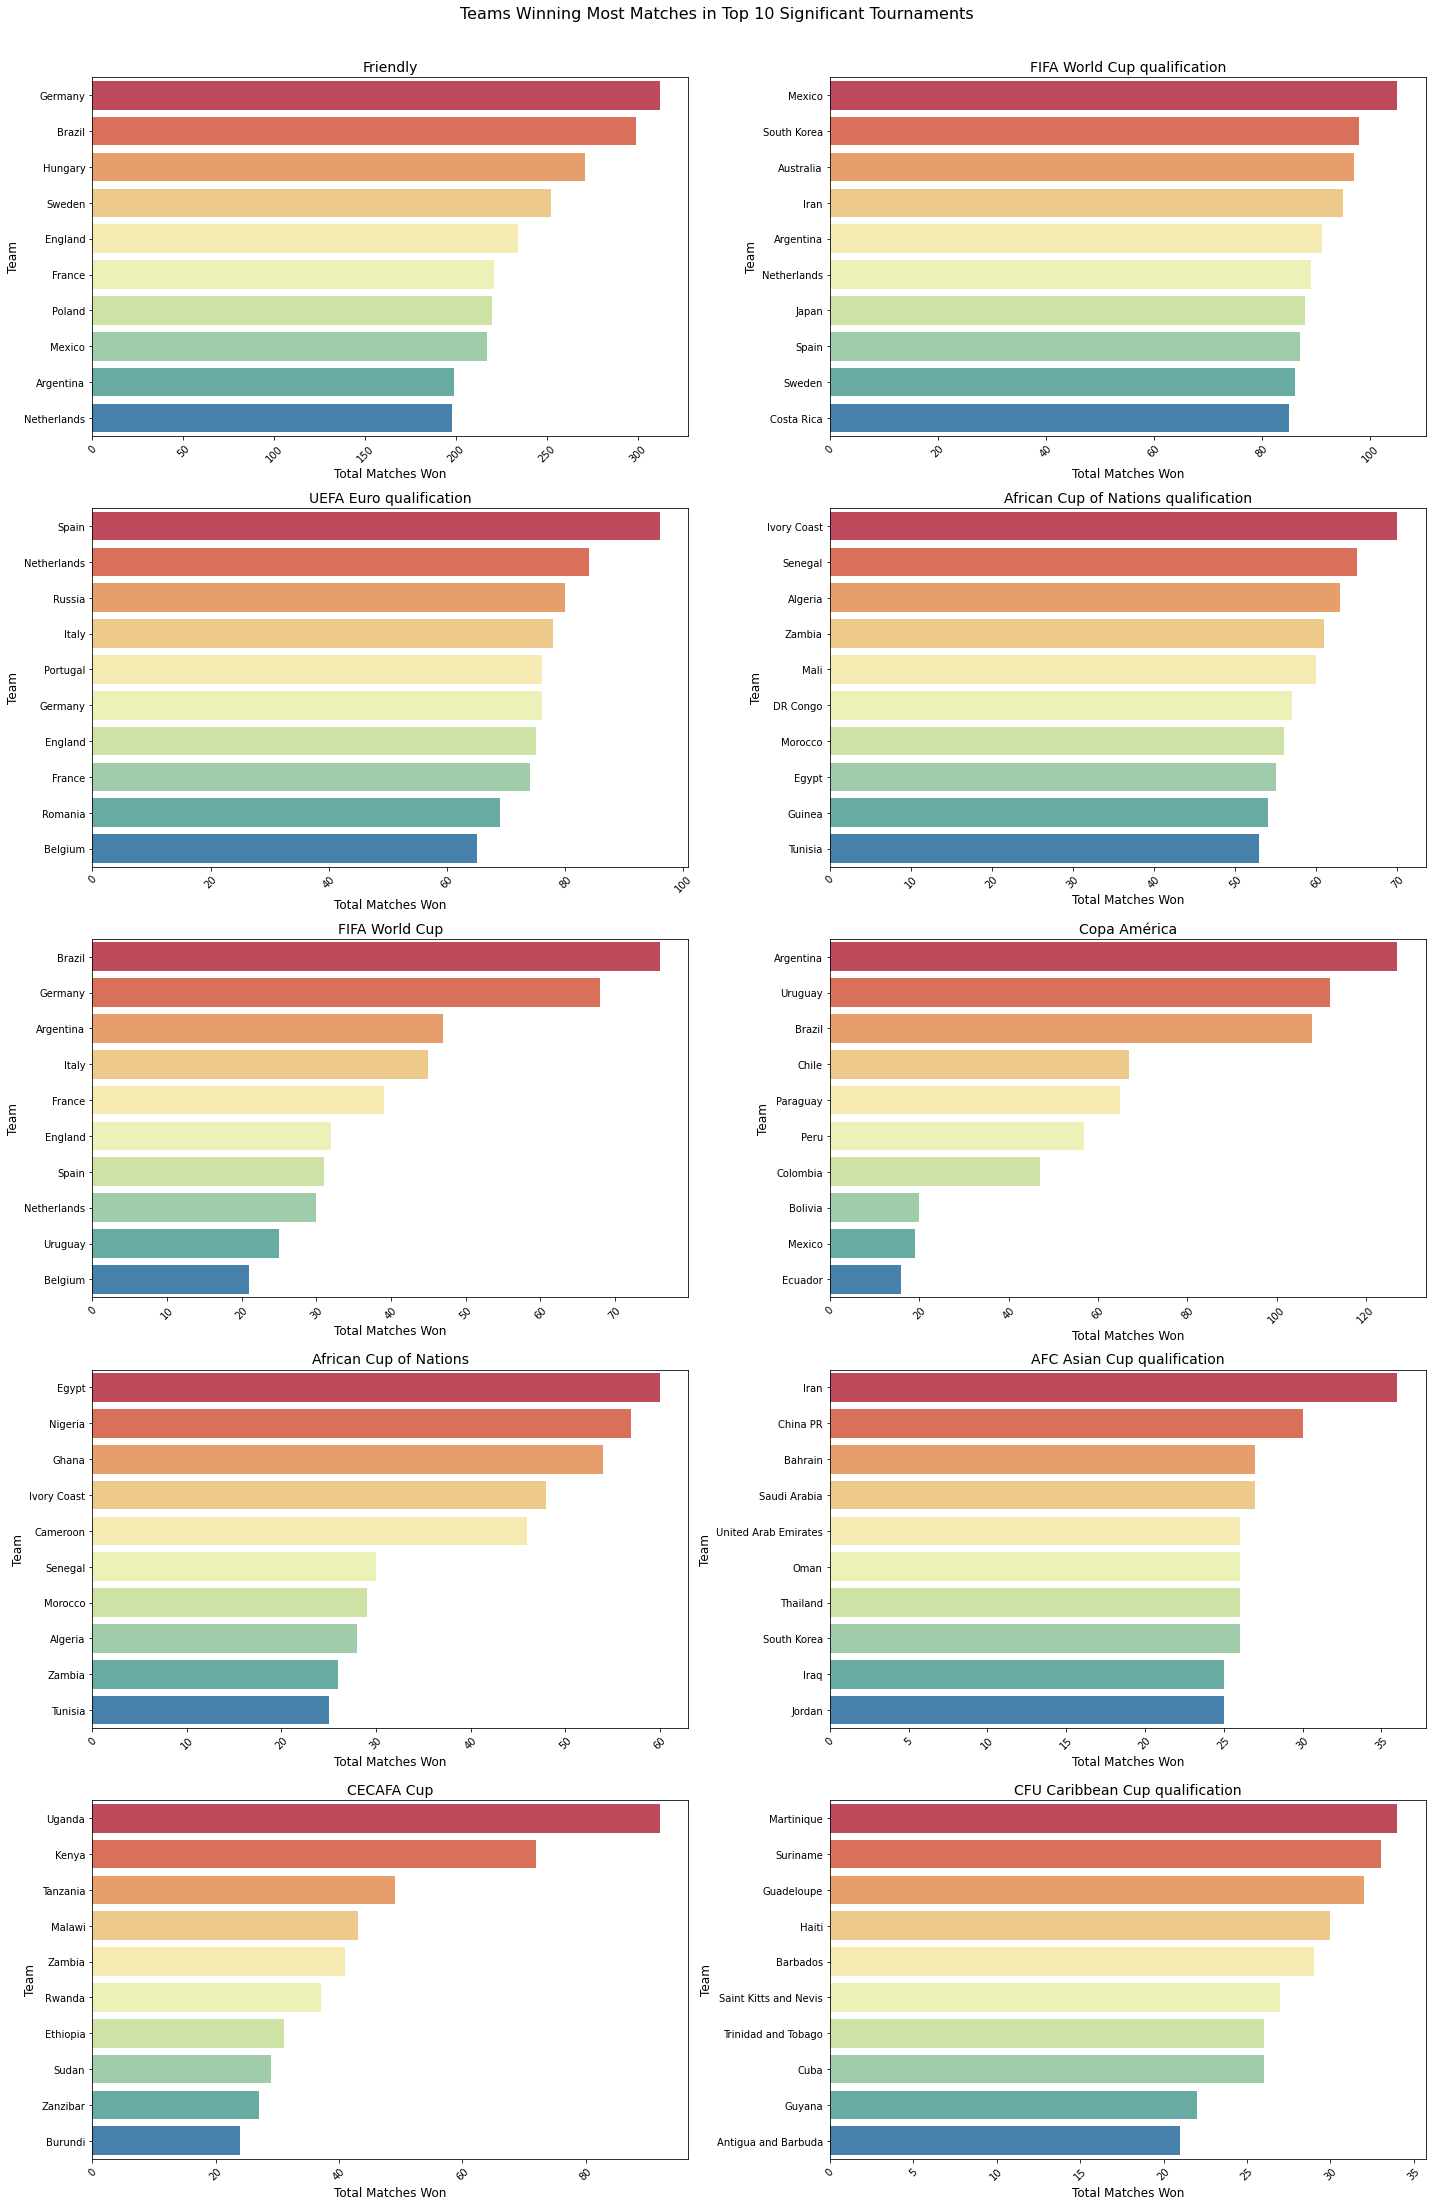

In [19]:

# Convert date columns to datetime for proper merging
results_df['date'] = pd.to_datetime(results_df['date'])

# Calculate total matches won by home teams
home_wins = results_df[results_df['home_score'] > results_df['away_score']].groupby(['tournament', 'home_team']).size().reset_index(name='total_matches_won')
home_wins = home_wins.rename(columns={'home_team': 'team'})

# Calculate total matches won by away teams
away_wins = results_df[results_df['away_score'] > results_df['home_score']].groupby(['tournament', 'away_team']).size().reset_index(name='total_matches_won')
away_wins = away_wins.rename(columns={'away_team': 'team'})

# Combine home and away wins
winning_teams = pd.concat([home_wins, away_wins], ignore_index=True)
winning_teams = winning_teams.groupby(['tournament', 'team']).sum().reset_index()

# Get the top 10 significant tournaments
tournament_counts = results_df['tournament'].value_counts()
top_10_tournaments = tournament_counts.head(10).index

# Function to get the top winning teams for each tournament
def get_top_teams_by_tournament(winning_teams, tournament_name):
    tournament_matches = winning_teams[winning_teams['tournament'] == tournament_name]
    sorted_matches = tournament_matches.sort_values(by='total_matches_won', ascending=False)
    return sorted_matches.head(10)

# Create subplots
num_cols = 2
num_rows = (len(top_10_tournaments) + 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 30))
axes = axes.flatten()

# Plot the team that won the most matches in each tournament
for idx, cup in enumerate(top_10_tournaments):
    ax = axes[idx]
    cup_data = get_top_teams_by_tournament(winning_teams, cup)
    sns.barplot(ax=ax, x='total_matches_won', y='team', data=cup_data, palette='Spectral')
    ax.set_title(cup, fontsize=14)
    ax.set_xlabel('Total Matches Won', fontsize=12)
    ax.set_ylabel('Team', fontsize=12)
    ax.tick_params(axis='x', labelsize=10, rotation=45)
    ax.tick_params(axis='y', labelsize=10)

# Adjust layout
plt.tight_layout()
plt.suptitle("Teams Winning Most Matches in Top 10 Significant Tournaments", y=1.02, fontsize=16)
plt.show()

### For each tournament we can try to predict better which team is more likely to win based on this result
## Key observations
### Teams that Appear in Multiple Tournaments as Top scorers
**Germany**: Appears in 4 tournaments
**Brazil:** Appears in 4 tournaments 
**Argentina:** Appears in 3 tournaments
**Netherlands:** Appears in 3 tournaments 
**Mexico:** Appears in 3 tournaments 
**Spain:** Appears in 3 tournaments 
**England:** Appears in 3 tournaments 
**France**: Appears in 3 tournaments 
**Italy:** Appears in 3 tournaments 
**Sweden:** Appears in 3 tournaments
### Top Teams by Total Wins Across All Tournaments
Germany: 532 wins
Brazil: 483 wins
Argentina: 464 wins
Mexico: 341 wins
Netherlands: 331 wins
Spain: 314 wins
England: 341 wins
France: 334 wins
Italy: 276 wins
Sweden: 338 win

### Conclusion
**These teams can be marked as likely to win based on their consistent performance across different tournaments , we can call them "strong" teams or countries.** espeacially Germany, Brazil, and Argentina

## Visualize top playing Teams and their Most Played tournaments 

we would like to visualize the experience in the tournament type that will maybe have an impact on if the team won - **as more/less experienced** as that specific tournament than her rival. 

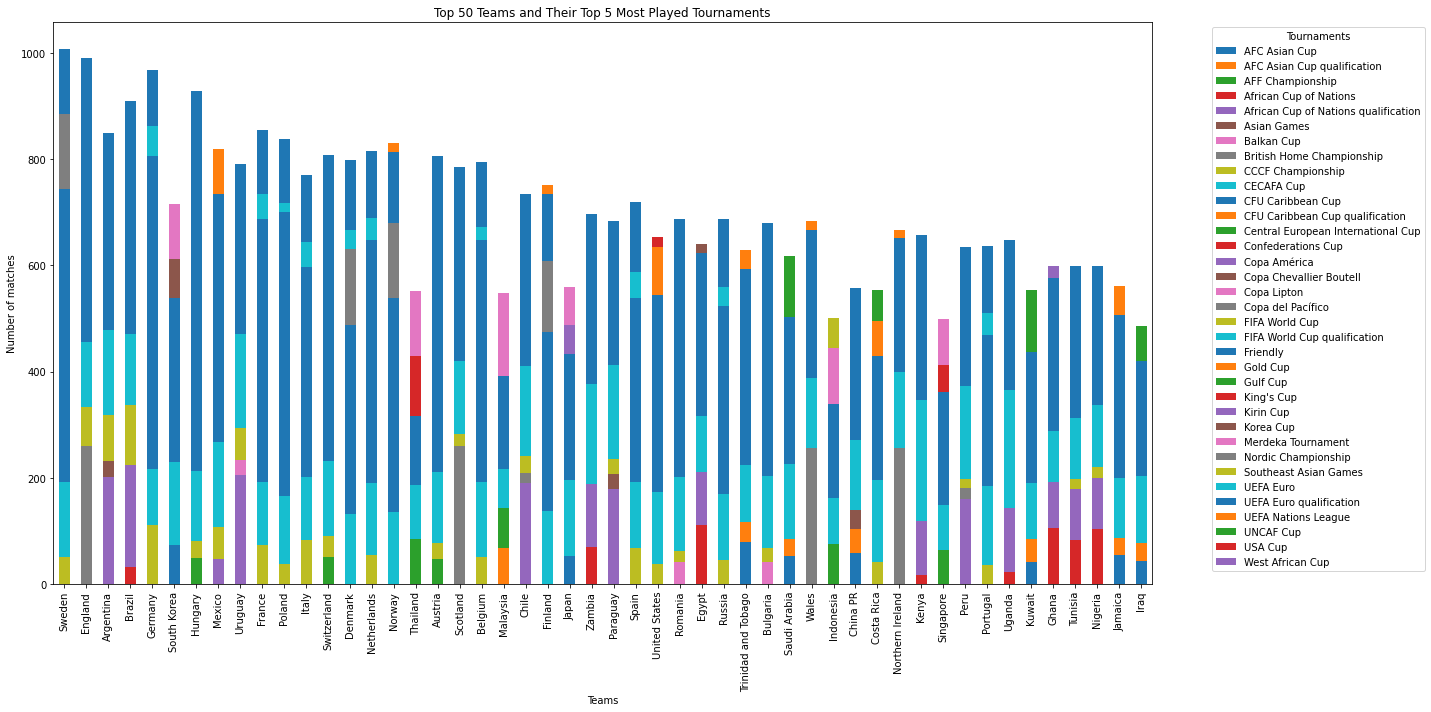

In [20]:
# Count matches played by each team (home + away)
team_counts = results_df.assign(team=results_df['home_team']).groupby('team').size() + results_df.assign(team=results_df['away_team']).groupby('team').size()

# Get top 50 teams
top_teams = team_counts.nlargest(50).index

# Initialize a dictionary to hold data
top_teams_tournaments = {}

# For each top team, get their most played tournaments
for team in top_teams:
    home_tournaments = results_df.loc[results_df['home_team'] == team, 'tournament'].value_counts()
    away_tournaments = results_df.loc[results_df['away_team'] == team, 'tournament'].value_counts()
    all_tournaments = home_tournaments.add(away_tournaments, fill_value=0)
    top_tournaments = all_tournaments.nlargest(5)
    top_teams_tournaments[team] = top_tournaments

# Convert the dictionary into a DataFrame
top_teams_tournaments_df = pd.DataFrame(top_teams_tournaments)
top_teams_tournaments_df.fillna(0, inplace=True)

# Plot top 50 teams and their top 5 most played tournaments
top_teams_tournaments_df.T.plot(kind='bar', stacked=True, figsize=(20,10))

plt.title('Top 50 Teams and Their Top 5 Most Played Tournaments')
plt.xlabel('Teams')
plt.ylabel('Number of matches')
plt.legend(title='Tournaments', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

we will use tournament experience in the **next section as a new feature**, as there is a notable variety between team exp. which may affect on winning

# Section B

# Section B - Data Pre-processing 
### NOTE:
In the Previous Section we manipulated some of our data sets to visualize wins(for example).
however, the features and changes weren't strict to the guidance and were made temporary, on temporary dataset loading **just in order for us to be able to visualize the data and correlations**
### in this section we will implement a complete Data Pre-processing with imputations, droppings, and Feature engineering

In [3]:
import pandas as pd
import numpy as np
# Load the datasets 
results_data = pd.read_csv('results.csv')
shootouts_data = pd.read_csv('shootouts.csv')
goalscorers_data = pd.read_csv('goalscorers.csv')

In [4]:
#Pharsing "Date" for later comaprisons
results_data['date'] = pd.to_datetime(results_data['date'])
goalscorers_data['date'] = pd.to_datetime(goalscorers_data['date'])
shootouts_data['date'] = pd.to_datetime(shootouts_data['date'])

### "Results" dataset manipulations
- Dropping missing values from team names as the games hasn't occurred yet 
- trying to fill missing scores fields in **"results" with data from "goalscorers"** - where failed we will drop remaining rows where 'home_score' or 'away_score' are still missing

In [4]:
# Dropping the rows where home_team, away_team, home_score or away_score is missing 
results_data.dropna(subset=['home_team', 'away_team', 'home_score', 'away_score'], inplace=True)

# Loop through the rows where home_score or away_score are missing
for index, row in results_data[results_data['home_score'].isna() | results_data['away_score'].isna()].iterrows():
    
    # Retrieve equivalent matches from the goalscorers_data DataFrame 
    equivalent_match = goalscorers_data[(goalscorers_data['date'] == row['date']) & 
                                        (goalscorers_data['home_team'] == row['home_team']) &
                                        (goalscorers_data['away_team'] == row['away_team'])]
    # If there is an equivalent match
    if not equivalent_match.empty:
        
        # Calculate the home_score and away_score by counting the goals
        home_score = equivalent_match[equivalent_match['team'] == row['home_team']].shape[0]
        away_score = equivalent_match[equivalent_match['team'] == row['away_team']].shape[0]
        
        # Replace the missing values in the results_data DataFrame
        results_data.at[index, 'home_score'] = home_score if pd.isnull(row['home_score']) else row['home_score']
        results_data.at[index, 'away_score'] = away_score if pd.isnull(row['away_score']) else row['away_score']

# After attempting to fill missing scores, drop remaining rows where 'home_score' or 'away_score' are still missing
results_data.dropna(subset=['home_score', 'away_score'], inplace=True)

- changing boolean 'neutral' feature to 0 / 1

In [5]:

results_data['neutral'] = results_data['neutral'].apply(lambda x: 1 if x == True else 0)

### "GoalScorers" dataset manipulations
- Filling 'scorer' missing values with the player who scored the most
- Filling 'minute' missing values with the average of scoring minute for that team

In [5]:
# Calculate the scorer who has scored the most for each team
most_frequent_scorer = goalscorers_data.groupby('team')['scorer'].apply(lambda x: x.mode()[0]).reset_index()

# Create a scorer mapping from the most frequent scorer DataFrame
scorer_mapping = {row['team']: row['scorer'] for _, row in most_frequent_scorer.iterrows()}

# Replace NaN values in the scorer column with the most frequent scorer of the respective team
goalscorers_data['scorer'] = goalscorers_data.apply(
    lambda row: scorer_mapping[row['team']] if pd.isna(row['scorer']) else row['scorer'],
    axis=1
)

# Calculate the average minute a team scores
average_scoring_minute = goalscorers_data.groupby('team')['minute'].mean().reset_index()

# Create a minute mapping from the average scoring minute DataFrame
minute_mapping = {row['team']: row['minute'] for _, row in average_scoring_minute.iterrows()}

# Replace NaN values in the minute column with the average minute of the respective team
goalscorers_data['minute'] = goalscorers_data.apply(
    lambda row: minute_mapping[row['team']] if pd.isna(row['minute']) else row['minute'],
    axis=1
)

### "Shootouts" dataset manipulations
- Dropping 'first_scorer' feature column due to almost 65% missing values in feature data

In [6]:
# Drop the 'first_shooter' column from the 'shootouts_data' DataFrame
shootouts_data.drop('first_shooter', axis=1, inplace=True)

# Feature engineering

### Create the Home team won feature:

In [8]:
# Create Home team won feature
def home_team_won(row):
    if row['home_score'] > row['away_score']:
        return True
    elif row['home_score'] < row['away_score']:
        return False
    else:  # It's a draw, check shootouts
        shootout_result = shootouts_data[
            (shootouts_data['date'] == row['date']) & 
            ((shootouts_data['home_team'] == row['home_team']) & 
             (shootouts_data['away_team'] == row['away_team']) | 
             (shootouts_data['home_team'] == row['away_team']) & 
             (shootouts_data['away_team'] == row['home_team']))
        ]
        if not shootout_result.empty and shootout_result.iloc[0]['winner'] == row['home_team']:
            return True
        elif not shootout_result.empty and shootout_result.iloc[0]['winner'] == row['away_team']:
            return False
        return False


results_data['home_team_won'] = results_data.apply(home_team_won, axis=1)

### Calculate and add Win Rates feature:

**in this (and later) calculation we need to remember that a specific team can appear as home_team and as away_team in her past matches**

In [9]:
# Sort results_data by date
results_data_sorted = results_data.sort_values('date')

# Compute the cumulative count of total matches and wins for each team
results_data_sorted['home_wins'] = results_data_sorted['home_team_won']
results_data_sorted['away_wins'] = ~results_data_sorted['home_team_won']

# Create cumulative wins and matches for each team
results_data_sorted['team'] = results_data_sorted['home_team']
results_data_sorted['team_wins'] = results_data_sorted['home_wins']
results_data_sorted['team_matches'] = 1

away_data = results_data_sorted[['date', 'away_team', 'away_wins']].copy()
away_data.columns = ['date', 'team', 'team_wins']
away_data.loc[:, 'team_matches'] = 1

# Combine home and away data
combined_data = pd.concat([results_data_sorted[['date', 'team', 'team_wins', 'team_matches']], away_data], ignore_index=True)
combined_data = combined_data.sort_values('date')

# Calculate cumulative wins and matches
combined_data['cumulative_wins'] = combined_data.groupby('team')['team_wins'].cumsum().shift(fill_value=0)
combined_data['cumulative_matches'] = combined_data.groupby('team')['team_matches'].cumsum().shift(fill_value=0)

# Calculate win rates
combined_data['win_rate'] = combined_data['cumulative_wins'] / combined_data['cumulative_matches']
combined_data['win_rate'].fillna(0, inplace=True)

# Map win rates back to original results_data
results_data_sorted['home_team_winrate'] = results_data_sorted.apply(lambda row: combined_data[(combined_data['date'] == row['date']) & (combined_data['team'] == row['home_team'])]['win_rate'].values[0], axis=1)
results_data_sorted['away_team_winrate'] = results_data_sorted.apply(lambda row: combined_data[(combined_data['date'] == row['date']) & (combined_data['team'] == row['away_team'])]['win_rate'].values[0], axis=1)

# Put the new features from results_data_sorted to original results_data
results_data['home_team_winrate'] = results_data_sorted['home_team_winrate']
results_data['away_team_winrate'] = results_data_sorted['away_team_winrate']

In [10]:
results_data.head(500)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_team_won,home_team_winrate,away_team_winrate
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,0,False,0.000000,0.000000
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,0,True,1.000000,1.000000
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,0,True,0.000000,0.333333
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,0,False,0.666667,0.500000
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,0,True,0.400000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
495,1917-08-19,Sweden,Norway,3.0,3.0,Friendly,Helsingborg,Sweden,0,False,0.166667,0.603774
496,1917-09-02,Uruguay,Argentina,1.0,0.0,Copa Newton,Montevideo,Uruguay,0,True,0.588235,0.480000
497,1917-09-16,Norway,Sweden,0.0,2.0,Friendly,Kristiania,Norway,0,False,0.592593,0.160000
498,1917-09-30,Uruguay,Chile,4.0,0.0,Copa América,Montevideo,Uruguay,0,True,0.090909,0.600000


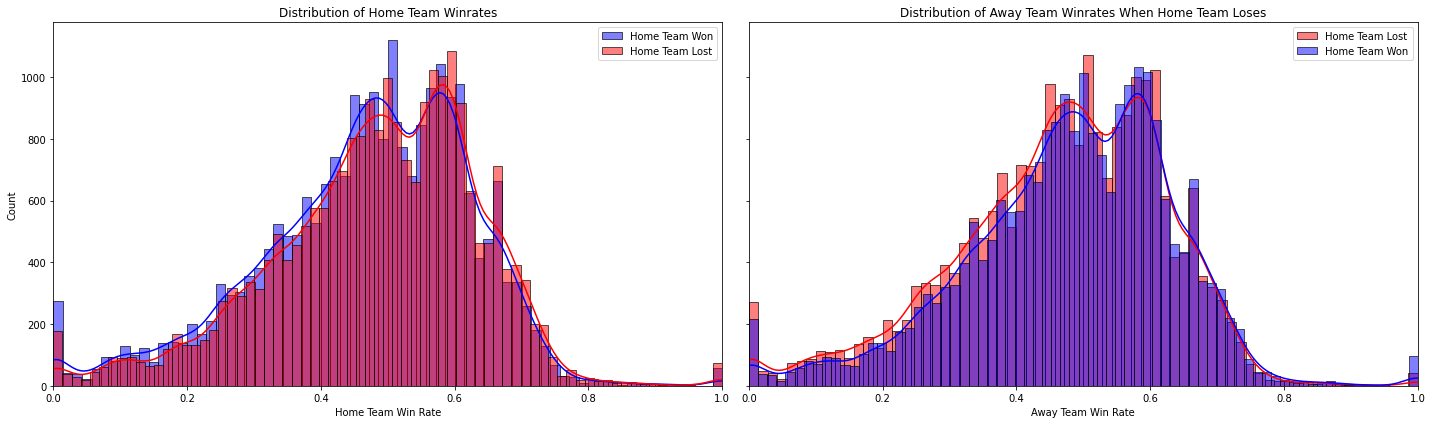

In [7]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

# Plot the histogram for home_team_winrate
sns.histplot(data=results_data[(results_data['home_team_won'] == True) & 
                               (results_data['home_team_winrate'] >= 0) & 
                               (results_data['home_team_winrate'] <= 1)], 
             x="home_team_winrate", color='blue', label='Home Team Won', kde=True, ax=axes[0])

sns.histplot(data=results_data[(results_data['home_team_won'] == False) & 
                               (results_data['home_team_winrate'] >= 0) & 
                               (results_data['home_team_winrate'] <= 1)], 
             x="home_team_winrate", color='red', label='Home Team Lost', kde=True, ax=axes[0])

# Add titles and labels for the first subplot
axes[0].set_title('Distribution of Home Team Winrates')
axes[0].set_xlabel('Home Team Win Rate')
axes[0].set_ylabel('Count')
axes[0].set_xlim([0, 1])
axes[0].legend()

# Plot the histogram for away_team_winrate
sns.histplot(data=results_data[(results_data['home_team_won'] == False) & 
                               (results_data['away_team_winrate'] >= 0) & 
                               (results_data['away_team_winrate'] <= 1)], 
             x="away_team_winrate", color='red', label='Home Team Lost', kde=True, ax=axes[1])

sns.histplot(data=results_data[(results_data['home_team_won'] == True) & 
                               (results_data['away_team_winrate'] >= 0) & 
                               (results_data['away_team_winrate'] <= 1)], 
             x="away_team_winrate", color='blue', label='Home Team Won', kde=True, ax=axes[1])

# Add titles and labels for the second subplot
axes[1].set_title('Distribution of Away Team Winrates When Home Team Loses')
axes[1].set_xlabel('Away Team Win Rate')
axes[1].set_xlim([0, 1])
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

### Calculate and add average goals feature:

In [12]:
# Sort results_data by date
results_data_sorted = results_data.sort_values('date')

# Create a DataFrame for cumulative goals and matches
home_teams = results_data_sorted[['date', 'home_team', 'home_score']].rename(columns={'home_team': 'team', 'home_score': 'goals'})
away_teams = results_data_sorted[['date', 'away_team', 'away_score']].rename(columns={'away_team': 'team', 'away_score': 'goals'})

# Combine home and away data into one DataFrame
teams = pd.concat([home_teams, away_teams]).sort_values('date').reset_index(drop=True)

# Calculate cumulative goals and matches for each team
teams['cumulative_goals'] = teams.groupby('team')['goals'].cumsum().shift(fill_value=0)
teams['cumulative_matches'] = teams.groupby('team').cumcount().shift(fill_value=0) + 1

# Calculate average goals
teams['average_goals'] = teams['cumulative_goals'] / teams['cumulative_matches']
teams['average_goals'].fillna(0, inplace=True)

# Ensure no duplicate index values are present
teams.reset_index(drop=True, inplace=True)

# Find the team with the highest average goals
max_average_goals = teams.loc[teams['average_goals'].idxmax()]

# Merge the calculated averages back to the original DataFrame
results_data_sorted = results_data_sorted.merge(
    teams[['date', 'team', 'average_goals']].rename(columns={'team': 'home_team', 'average_goals': 'home_team_averagegoals'}),
    on=['date', 'home_team'],
    how='left'
)

results_data_sorted = results_data_sorted.merge(
    teams[['date', 'team', 'average_goals']].rename(columns={'team': 'away_team', 'average_goals': 'away_team_averagegoals'}),
    on=['date', 'away_team'],
    how='left'
)

# Replace NA values with 0
results_data_sorted['home_team_averagegoals'].fillna(0, inplace=True)
results_data_sorted['away_team_averagegoals'].fillna(0, inplace=True)

# Put the new features from results_data_sorted to the original results_data
results_data['home_team_averagegoals'] = results_data_sorted['home_team_averagegoals']
results_data['away_team_averagegoals'] = results_data_sorted['away_team_averagegoals']


# Display the team with the highest average goals
print("Team with the highest average goals:")
print(max_average_goals)

Team with the highest average goals:
date                  2014-06-02 00:00:00
team                       County of Nice
goals                                 2.0
cumulative_goals                     19.0
cumulative_matches                      1
average_goals                        19.0
Name: 75444, dtype: object


In [13]:
results_data.head(1500)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_team_won,home_team_winrate,away_team_winrate,home_team_averagegoals,away_team_averagegoals
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,0,False,0.000000,0.000000,0.000000,0.000000
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,0,True,1.000000,1.000000,0.000000,2.000000
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,0,True,0.000000,0.333333,1.000000,1.333333
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,0,False,0.666667,0.500000,1.666667,1.750000
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,0,True,0.400000,0.500000,1.400000,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1931-01-01,Basque Country,Catalonia,3.0,2.0,Friendly,Bilbao,Spain,0,True,0.058824,1.000000,1.428571,4.250000
1496,1931-01-25,Italy,France,5.0,0.0,Friendly,Bologna,Italy,0,True,0.304348,0.250000,6.000000,4.400000
1497,1931-02-11,Barbados,Martinique,3.0,2.0,Friendly,Bridgetown,Barbados,0,True,0.000000,0.555556,2.700000,6.285714
1498,1931-02-12,Barbados,Martinique,0.0,0.0,Friendly,Bridgetown,Barbados,0,False,0.500000,1.000000,1.250000,3.041176


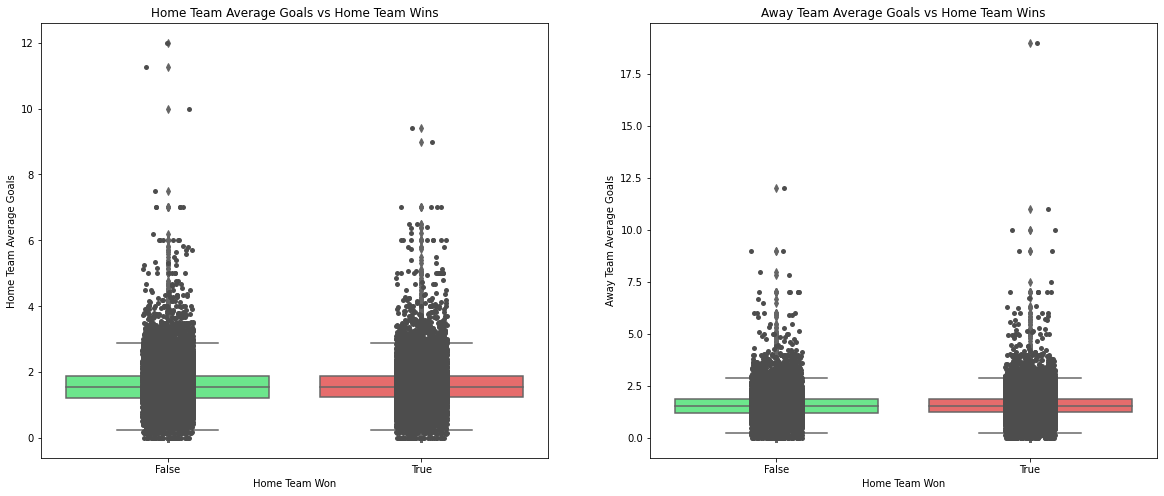

In [8]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Define a palette to ensure that colors will be
# shared across the subplots
palette = {True: "#FA5858", False: "#58FA82"}

# Plot boxplots for home_team_averagegoals and whether the home team won
sns.boxplot(x="home_team_won", y="home_team_averagegoals", 
            data=results_data, palette=palette, ax=axes[0])
sns.stripplot(x="home_team_won", y="home_team_averagegoals", 
              data=results_data, color=".3", ax=axes[0])

# Add titles and labels for the first subplot
axes[0].set_title('Home Team Average Goals vs Home Team Wins')
axes[0].set_xlabel('Home Team Won')
axes[0].set_ylabel('Home Team Average Goals')

# Plot boxplots for away_team_averagegoals and whether the home team won 
sns.boxplot(x="home_team_won", y="away_team_averagegoals",
            data=results_data, palette=palette, ax=axes[1])
sns.stripplot(x="home_team_won", y="away_team_averagegoals",
              data=results_data, color=".3", ax=axes[1])

# Add titles and labels for the second subplot
axes[1].set_title('Away Team Average Goals vs Home Team Wins')
axes[1].set_xlabel('Home Team Won')
axes[1].set_ylabel('Away Team Average Goals')

plt.show()

# Adding Extra Features
### • Head-to-Head Performance
**- Head-to-Head Win Ratio:**
Historical win ratio of the home team against the away team.

**- Head-to-Head Goal Difference:** Historical goal difference between the home and away team in previous encounters

In [15]:
# Sort results_data by date to process in chronological order
results_data_sorted2 = results_data.sort_values('date').reset_index(drop=True)

# Initialize columns for head-to-head statistics
results_data_sorted2['head_to_head_win_ratio'] = 0.0
results_data_sorted2['head_to_head_goal_diff'] = 0

# Dictionary to keep track of head-to-head statistics
head_to_head_stats = {}

# Function to update head-to-head statistics
def update_head_to_head_stats(row):
    home_team = row['home_team']
    away_team = row['away_team']
    match_key = tuple(sorted([home_team, away_team]))  # Ensure the key is consistent

    if match_key not in head_to_head_stats:
        head_to_head_stats[match_key] = {'total_games': 0, 'home_wins': 0, 'home_goals': 0, 'away_goals': 0}

    stats = head_to_head_stats[match_key]

    # Calculate head-to-head statistics before the current match
    if stats['total_games'] > 0:
        row['head_to_head_win_ratio'] = stats['home_wins'] / stats['total_games']
        row['head_to_head_goal_diff'] = stats['home_goals'] - stats['away_goals']
    else:
        row['head_to_head_win_ratio'] = 0.0
        row['head_to_head_goal_diff'] = 0

    # Update statistics with the current match
    stats['total_games'] += 1
    stats['home_wins'] += row['home_team_won']
    stats['home_goals'] += row['home_score']
    stats['away_goals'] += row['away_score']

    head_to_head_stats[match_key] = stats
    return row

# Apply the function to each row
results_data_sorted2 = results_data_sorted2.apply(update_head_to_head_stats, axis=1)

# Update the original results_data with the new features
results_data['head_to_head_win_ratio'] = results_data_sorted2['head_to_head_win_ratio']
results_data['head_to_head_goal_diff'] = results_data_sorted2['head_to_head_goal_diff']

In [16]:
results_data.head(1500)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_team_won,home_team_winrate,away_team_winrate,home_team_averagegoals,away_team_averagegoals,head_to_head_win_ratio,head_to_head_goal_diff
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,0,False,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,0,True,1.000000,1.000000,0.000000,2.000000,0.000000,0.0
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,0,True,0.000000,0.333333,1.000000,1.333333,0.500000,2.0
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,0,False,0.666667,0.500000,1.666667,1.750000,0.666667,3.0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,0,True,0.400000,0.500000,1.400000,1.500000,0.500000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1931-01-01,Basque Country,Catalonia,3.0,2.0,Friendly,Bilbao,Spain,0,True,0.058824,1.000000,1.428571,4.250000,0.375000,7.0
1496,1931-01-25,Italy,France,5.0,0.0,Friendly,Bologna,Italy,0,True,0.304348,0.250000,6.000000,4.400000,0.600000,18.0
1497,1931-02-11,Barbados,Martinique,3.0,2.0,Friendly,Bridgetown,Barbados,0,True,0.000000,0.555556,2.700000,6.285714,0.000000,0.0
1498,1931-02-12,Barbados,Martinique,0.0,0.0,Friendly,Bridgetown,Barbados,0,False,0.500000,1.000000,1.250000,3.041176,1.000000,1.0


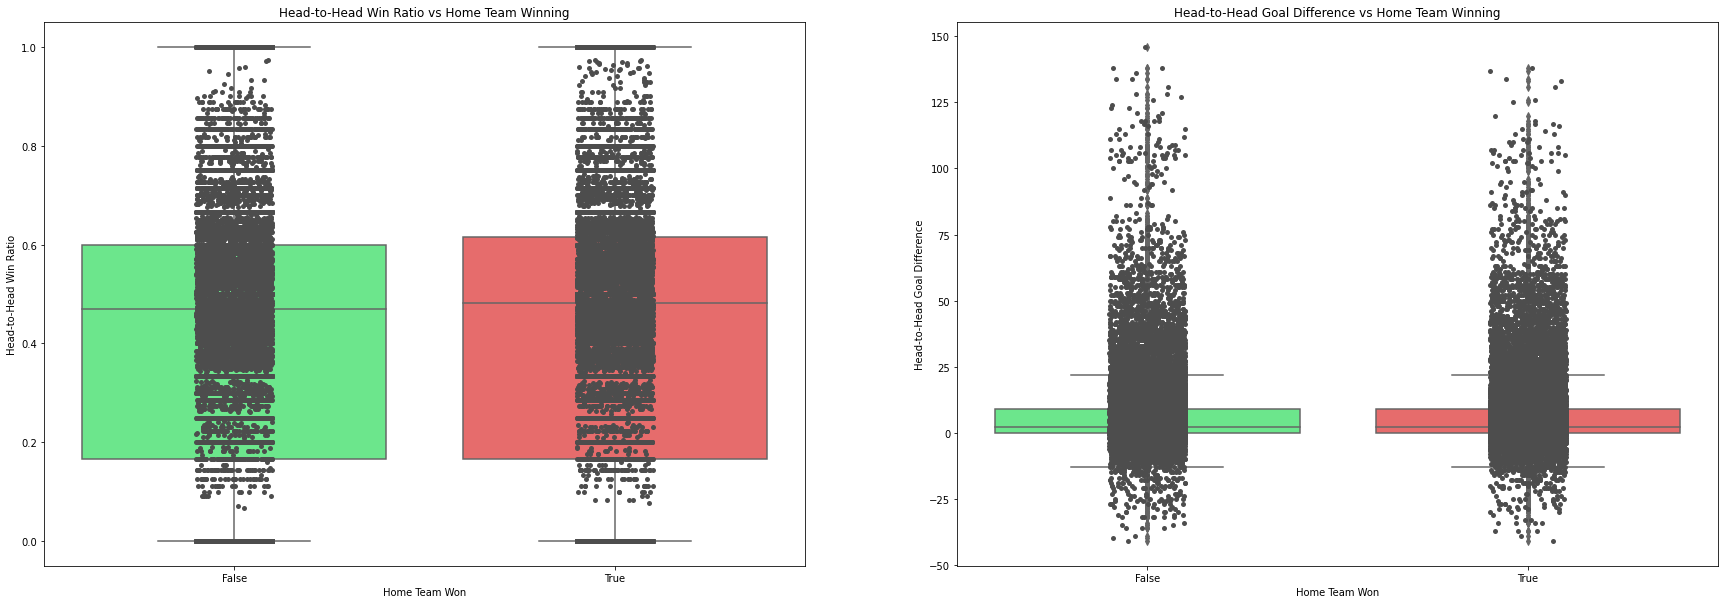

In [9]:
# Import the necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(30, 10))

# Define a palette to ensure that colors will be
# shared across the subplots
palette = {True: "#FA5858", False: "#58FA82"}

# Plot boxplots for 'head_to_head_win_ratio' vs Home Team Won
sns.boxplot(x='home_team_won', y='head_to_head_win_ratio', data=results_data, palette=palette, ax=axes[0])
sns.stripplot(x='home_team_won', y='head_to_head_win_ratio', data=results_data, color=".3", ax=axes[0])

axes[0].set_title('Head-to-Head Win Ratio vs Home Team Winning')
axes[0].set_xlabel('Home Team Won')
axes[0].set_ylabel('Head-to-Head Win Ratio')

# Plot boxplots for 'head_to_head_goal_diff' vs Home Team Won
sns.boxplot(x='home_team_won', y='head_to_head_goal_diff', data=results_data, palette=palette, ax=axes[1])
sns.stripplot(x='home_team_won', y='head_to_head_goal_diff', data=results_data, color=".3", ax=axes[1])

axes[1].set_title('Head-to-Head Goal Difference vs Home Team Winning')
axes[1].set_xlabel('Home Team Won')
axes[1].set_ylabel('Head-to-Head Goal Difference')

plt.show()

### •Recent Performance:
**- Home Team Recent Performance:** Average points (win = 3, draw = 1, loss = 0) obtained by the home team in the last 7 matches.

**- Away Team Recent Performance:** Average points obtained by the away team in the last 7 matches.

In [18]:
# Sort results_data by date to process in chronological order
results_data_sorted3 = results_data.sort_values('date').reset_index(drop=True)

# Define a function to assign points based on the match outcome
def assign_points(outcome, team_is_home):
    if outcome == True:  # Home team won
        return 3 if team_is_home else 0
    elif outcome == False:  # Away team won
        return 0 if team_is_home else 3
    else:  # Draw (if applicable)
        return 1

# Assign points to each match for both home and away teams
results_data_sorted3['home_points'] = results_data_sorted3.apply(lambda row: assign_points(row['home_team_won'], True), axis=1)
results_data_sorted3['away_points'] = results_data_sorted3.apply(lambda row: assign_points(row['home_team_won'], False), axis=1)

# Create a combined DataFrame to calculate recent performance
combined_points = pd.concat([
    results_data_sorted3[['date', 'home_team', 'home_points']].rename(columns={'home_team': 'team', 'home_points': 'points'}),
    results_data_sorted3[['date', 'away_team', 'away_points']].rename(columns={'away_team': 'team', 'away_points': 'points'})
]).sort_values('date').reset_index(drop=True)

# Calculate rolling average points for each team, shifting by 1 to exclude the current match
combined_points['recent_performance'] = combined_points.groupby('team')['points'].transform(lambda x: x.shift(1).rolling(7, min_periods=1).mean())

# Merge the recent performance back to the original DataFrame
results_data_sorted3 = results_data_sorted3.merge(
    combined_points[['date', 'team', 'recent_performance']].rename(columns={'team': 'home_team', 'recent_performance': 'home_recent_performance'}),
    on=['date', 'home_team'], how='left'
)

results_data_sorted3 = results_data_sorted3.merge(
    combined_points[['date', 'team', 'recent_performance']].rename(columns={'team': 'away_team', 'recent_performance': 'away_recent_performance'}),
    on=['date', 'away_team'], how='left'
)

# Replace NA values with 0
results_data_sorted3['home_recent_performance'].fillna(0, inplace=True)
results_data_sorted3['away_recent_performance'].fillna(0, inplace=True)

# Add the new columns to the main dataframe
results_data['home_recent_performance'] = results_data_sorted3['home_recent_performance']
results_data['away_recent_performance'] = results_data_sorted3['away_recent_performance']

In [19]:
results_data.head(1500)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_team_won,home_team_winrate,away_team_winrate,home_team_averagegoals,away_team_averagegoals,head_to_head_win_ratio,head_to_head_goal_diff,home_recent_performance,away_recent_performance
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,0,False,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,0,True,1.000000,1.000000,0.000000,2.000000,0.000000,0.0,3.000000,0.000000
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,0,True,0.000000,0.333333,1.000000,1.333333,0.500000,2.0,0.000000,3.000000
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,0,False,0.666667,0.500000,1.666667,1.750000,0.666667,3.0,2.000000,1.000000
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,0,True,0.400000,0.500000,1.400000,1.500000,0.500000,3.0,1.500000,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1931-01-01,Basque Country,Catalonia,3.0,2.0,Friendly,Bilbao,Spain,0,True,0.058824,1.000000,1.428571,4.250000,0.375000,7.0,3.000000,3.000000
1496,1931-01-25,Italy,France,5.0,0.0,Friendly,Bologna,Italy,0,True,0.304348,0.250000,6.000000,4.400000,0.600000,18.0,3.000000,1.714286
1497,1931-02-11,Barbados,Martinique,3.0,2.0,Friendly,Bridgetown,Barbados,0,True,0.000000,0.555556,2.700000,6.285714,0.000000,0.0,2.500000,1.285714
1498,1931-02-12,Barbados,Martinique,0.0,0.0,Friendly,Bridgetown,Barbados,0,False,0.500000,1.000000,1.250000,3.041176,1.000000,1.0,2.142857,3.000000


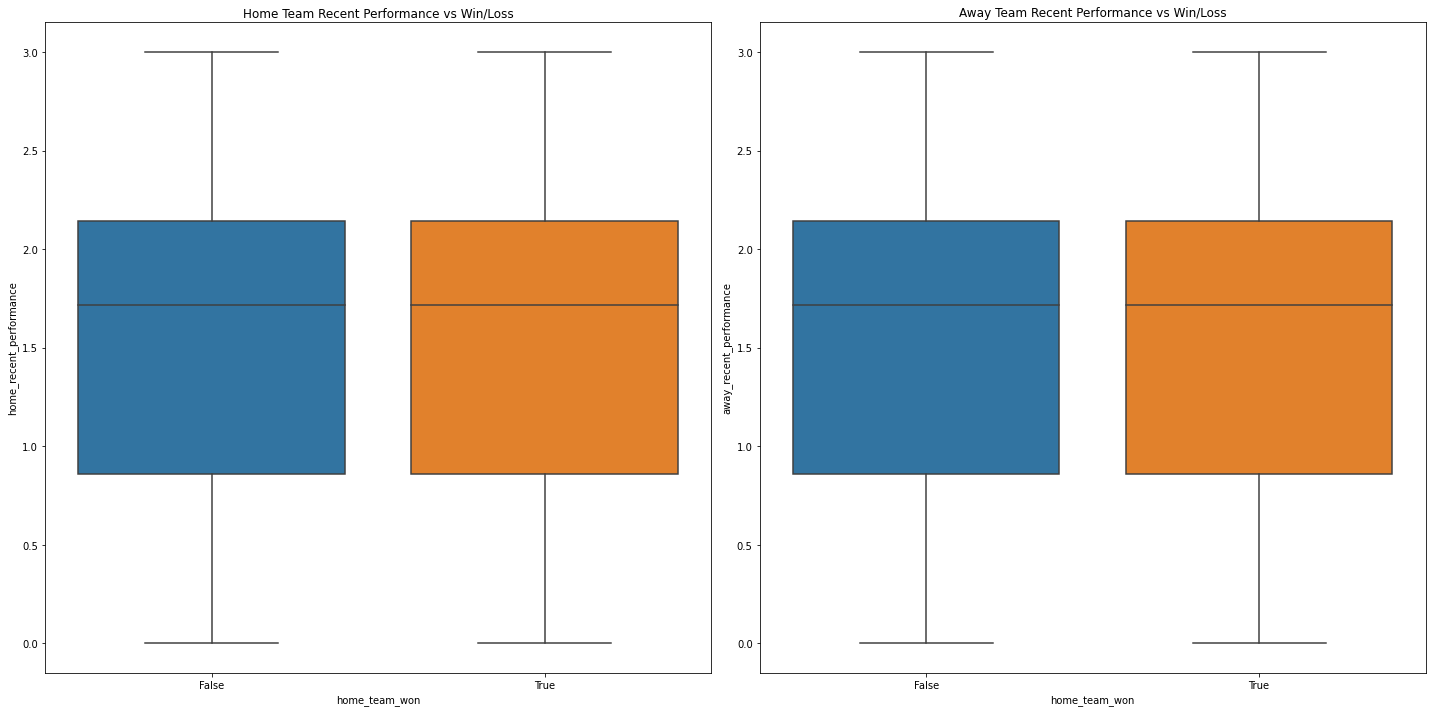

In [10]:
# Create a figure with two subplots 
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# plot boxplot for home_recent_performance
sns.boxplot(x='home_team_won', y='home_recent_performance', data=results_data, ax=axes[0])
axes[0].set_title('Home Team Recent Performance vs Win/Loss')

# plot boxplot for away_recent_performance
sns.boxplot(x='home_team_won', y='away_recent_performance', data=results_data, ax=axes[1])
axes[1].set_title('Away Team Recent Performance vs Win/Loss')

plt.tight_layout()
plt.show()

### • Tournament Experience:
  we will calculate each team's **experience in the given Tournament so far**

  we will also calculate and add the **tournament_experience_ratio** 

In [11]:
# Add a unique identifier for each match if not already present
if 'match_id' not in results_data.columns:
    results_data['match_id'] = range(1, len(results_data) + 1)

# Ensure date columns are in datetime format
results_data['date'] = pd.to_datetime(results_data['date'])

def calculate_tournament_experience(df):
    '''Function to compute the tournament experience and ratio'''
    tournament_exp = pd.concat([
        df[['date', 'home_team', 'tournament', 'match_id']].rename(columns={'home_team': 'team'}),
        df[['date', 'away_team', 'tournament', 'match_id']].rename(columns={'away_team': 'team'})
    ])
    tournament_exp.sort_values('date', inplace=True)
    tournament_exp['experience'] = tournament_exp.groupby(['team', 'tournament']).cumcount()

    home_exp = df.merge(
        tournament_exp.rename(columns={'team': 'home_team', 'experience': 'home_experience'}),
        on=['date', 'home_team', 'tournament', 'match_id'],
        how='left'
    )
    exp_with_away = home_exp.merge(
        tournament_exp.rename(columns={'team': 'away_team', 'experience': 'away_experience'}),
        on=['date', 'away_team', 'tournament', 'match_id'],
        how='left'
    )
    
    # Ensure 'away_experience' is not zero to avoid division by zero
    exp_with_away['away_experience'] = exp_with_away['away_experience'].replace(0, 1)
    
    exp_with_away['tournament_experience_ratio'] = exp_with_away['home_experience'] / exp_with_away['away_experience']
    
    # Replace inf values with max non-inf ratio
    max_ratio = exp_with_away[exp_with_away['tournament_experience_ratio'] != np.inf]['tournament_experience_ratio'].max()
    exp_with_away['tournament_experience_ratio'].replace(np.inf, max_ratio, inplace=True)
    
    # Replace NA values with 1
    exp_with_away['tournament_experience_ratio'].fillna(1, inplace=True)
    
    return exp_with_away[['match_id', 'home_experience', 'away_experience', 'tournament_experience_ratio']]

# Calculate tournament experience and ratio
tournament_experience = calculate_tournament_experience(results_data)

# Merge the calculated result back to the original DataFrame using 'match_id' to avoid duplicates
results_data = results_data.drop(columns=['home_experience', 'away_experience', 'tournament_experience_ratio'], errors='ignore')
results_data = results_data.merge(
    tournament_experience, on='match_id', how='left'
)

# Check for duplicates after merging
duplicates = results_data.duplicated(subset=['match_id']).sum()
print(f"Number of duplicate rows after merge: {duplicates}")

Number of duplicate rows after merge: 0


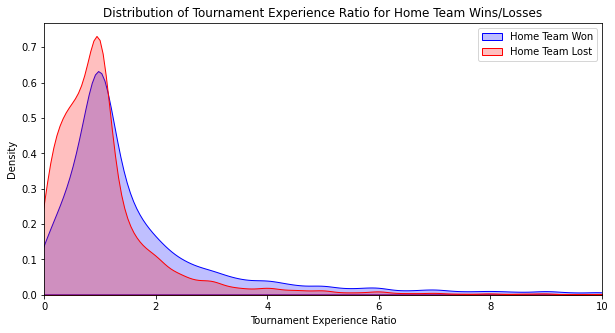

In [12]:
# Create a figure and plot
plt.figure(figsize=(10, 5))

# Plot distribution of 'tournament_experience_ratio' when home team won
sns.kdeplot(data=results_data[(results_data['home_team_won'] == 1) & 
                               (results_data['tournament_experience_ratio'] >= 0) & 
                               (results_data['tournament_experience_ratio'] <= 10)], 
            x='tournament_experience_ratio', color='blue', label='Home Team Won',
            fill=True)

# Plot distribution of 'tournament_experience_ratio' when home team lost
sns.kdeplot(data=results_data[(results_data['home_team_won'] == 0) & 
                               (results_data['tournament_experience_ratio'] >= 0) & 
                               (results_data['tournament_experience_ratio'] <= 10)], 
            x='tournament_experience_ratio', color='red', label='Home Team Lost',
            fill=True)

plt.title('Distribution of Tournament Experience Ratio for Home Team Wins/Losses')
plt.xlabel('Tournament Experience Ratio')
plt.ylabel('Density')
plt.xlim([0, 10])  # Limit x-axis between 0 and 10
plt.legend()
plt.show()

### •  Total Teams Goals (up to the match) feature
which sums all goals of each team so far **(all goals they have scored before the match)**

In [23]:
# Sort the DataFrame by date to ensure chronological order
results_data = results_data.sort_values(by='date')

# Initialize dictionaries to keep track of cumulative goals for each team
home_goals_cumulative = {}
away_goals_cumulative = {}

# Lists to store the cumulative goals up to each match for home and away teams
hometeam_total_goals_list = []
awayteam_total_goals_list = []

# Iterate through each match to calculate cumulative goals
for index, row in results_data.iterrows():
    home_team = row['home_team']
    away_team = row['away_team']
    
    # Initialize cumulative goals if not already present
    if home_team not in home_goals_cumulative:
        home_goals_cumulative[home_team] = 0
    if home_team not in away_goals_cumulative:
        away_goals_cumulative[home_team] = 0
    if away_team not in home_goals_cumulative:
        home_goals_cumulative[away_team] = 0
    if away_team not in away_goals_cumulative:
        away_goals_cumulative[away_team] = 0
    
    # Calculate total cumulative goals for home and away teams before the match
    hometeam_total_goals = home_goals_cumulative[home_team] + away_goals_cumulative[home_team]
    awayteam_total_goals = home_goals_cumulative[away_team] + away_goals_cumulative[away_team]
    
    # Append current cumulative goals to the list (before the current match's goals are added)
    hometeam_total_goals_list.append(hometeam_total_goals)
    awayteam_total_goals_list.append(awayteam_total_goals)
    
    # Update the cumulative goals after the match
    home_goals_cumulative[home_team] += row['home_score']
    away_goals_cumulative[away_team] += row['away_score']

# Add the cumulative goals as new columns to the DataFrame
results_data['hometeam_total_goals'] = hometeam_total_goals_list
results_data['awayteam_total_goals'] = awayteam_total_goals_list

### • ELO Rating feature:
The ELO rating system assigns a dynamic skill level to each team based on their match outcomes, adjusting ratings after each game to reflect performance. **It provides a predictive measure of team strength, factoring in both wins, losses, and draws against varying opponents.  and  based on !past performance!**

The ELO rating system is a method for calculating the relative skill levels of players or teams in competitive contexts. Originally developed for chess, it has been adapted for various sports and games. The ELO rating system is based on the idea that the difference in ratings between two teams predicts the outcome of a match between them.


In [24]:
# Initialize ELO ratings for each team
elo_ratings = {}

def initialize_elo(team, initial_elo=1500):
    if team not in elo_ratings:
        elo_ratings[team] = initial_elo

def calculate_expected_score(elo_a, elo_b):
    return 1 / (1 + 10 ** ((elo_b - elo_a) / 400))

def update_elo(winner_elo, loser_elo, k=32, draw=False):
    expected_winner = calculate_expected_score(winner_elo, loser_elo)
    expected_loser = calculate_expected_score(loser_elo, winner_elo)
    
    if draw:
        winner_elo += k * (0.5 - expected_winner)
        loser_elo += k * (0.5 - expected_loser)
    else:
        winner_elo += k * (1 - expected_winner)
        loser_elo += k * (0 - expected_loser)
    
    return winner_elo, loser_elo

# Add ELO columns to results_data
results_data['home_team_elo'] = 1500
results_data['away_team_elo'] = 1500

for index, row in results_data.iterrows():
    home_team = row['home_team']
    away_team = row['away_team']
    home_team_won = row['home_team_won']
    
    initialize_elo(home_team)
    initialize_elo(away_team)
    
    home_team_elo = elo_ratings[home_team]
    away_team_elo = elo_ratings[away_team]
    
    results_data.at[index, 'home_team_elo'] = home_team_elo
    results_data.at[index, 'away_team_elo'] = away_team_elo
    
    if home_team_won:
        home_team_elo, away_team_elo = update_elo(home_team_elo, away_team_elo)
    elif home_team_won == False and row['away_score'] > row['home_score']:  # Away team won
        away_team_elo, home_team_elo = update_elo(away_team_elo, home_team_elo)
    else:  # Draw
        home_team_elo, away_team_elo = update_elo(home_team_elo, away_team_elo, draw=True)
    
    elo_ratings[home_team] = home_team_elo
    elo_ratings[away_team] = away_team_elo

### •Away team won feature
will help us in later calculations

In [25]:
results_data['away_team_won'] = results_data.apply(lambda row: not row['home_team_won'] if row['home_score'] != row['away_score'] else False, axis=1)

# features correlation with home_team_won

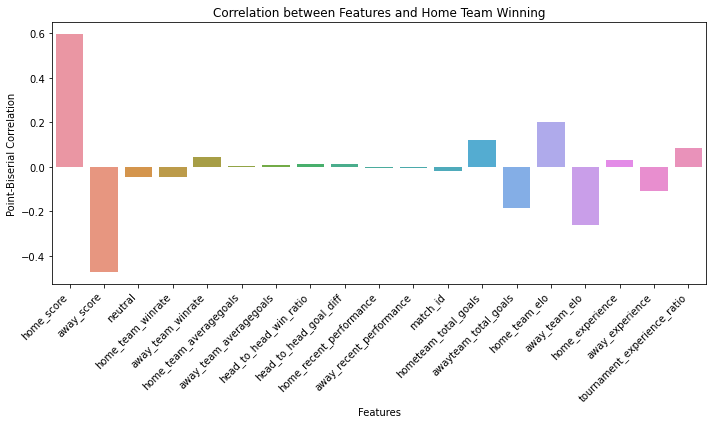

In [13]:
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy of the DataFrame
results_data_copy = results_data.copy()

# Convert target variable to binary (0 and 1)
results_data_copy['home_team_won'] = results_data_copy['home_team_won'].astype(int)

# Calculate point-biserial correlation for all numeric features with the target
correlations = {}
for column in results_data_copy.columns:
    if column != 'home_team_won':
        if np.issubdtype(results_data_copy[column].dtype, np.number):
            corr, _ = pointbiserialr(results_data_copy['home_team_won'], results_data_copy[column])
            correlations[column] = corr

# Convert to DataFrame for better visualization
corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_df.index, y=corr_df['Correlation'])
plt.title('Correlation between Features and Home Team Winning')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Point-Biserial Correlation')
plt.tight_layout()
plt.show()

In [14]:
results_data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_team_won,...,away_recent_performance,match_id,hometeam_total_goals,awayteam_total_goals,home_team_elo,away_team_elo,away_team_won,home_experience,away_experience,tournament_experience_ratio
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,0,False,...,0.0,1,0.0,0.0,1500.000000,1500.000000,False,0,1,0.0
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,0,True,...,0.0,2,0.0,0.0,1500.000000,1500.000000,False,1,1,1.0
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,0,True,...,3.0,3,2.0,4.0,1484.000000,1516.000000,False,2,2,1.0
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,0,False,...,1.0,4,5.0,4.0,1498.530498,1501.469502,False,3,3,1.0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,0,True,...,1.5,5,6.0,7.0,1501.334159,1498.665841,False,4,4,1.0


**getting results with features** (we exported it to not run all of the code again)

In [ ]:
results_data = pd.read_csv('results_with_Features.csv')

# Section C

# Section C - Prediction Models

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# relevant features for model training
features = [
    'home_team_winrate', 'away_team_winrate',
    'head_to_head_goal_diff', 'home_recent_performance', 'away_recent_performance','hometeam_total_goals','awayteam_total_goals',
    'tournament_experience_ratio', 'head_to_head_win_ratio','neutral','home_team_elo','away_team_elo'
]
X = results_data[features]
y = results_data['home_team_won']

# Output the shapes of the features and labels
X.shape, y.shape

((47267, 12), (47267,))

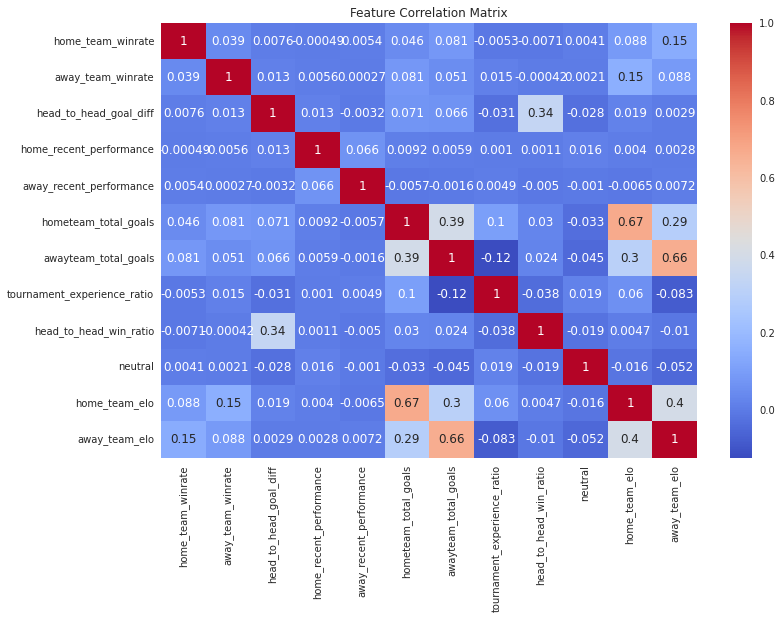

In [32]:
# Check feature correlations
correlation_matrix = results_data[features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best parameters for Logistic Regression: {'C': 0.01}
Best parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 200}
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Model                Accuracy Mean        Accuracy Std         F1-Score Mean        F1-Score Std        
Random Forest        0.6832               0.0121               0.6819               0.0148              
Logistic Regression  0.6814               0.0185               0.6789               0.0197              
AdaBoost             0.6845               0.0131               0.6815               0.0130              
Gradient Boosting    0.6867               0.0125               0.6853               0.0154              


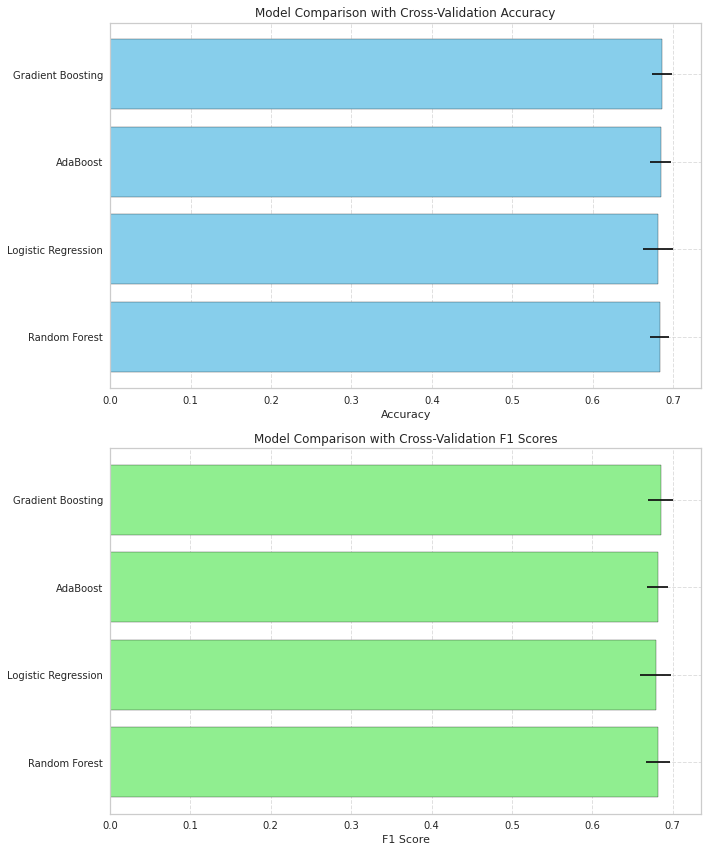

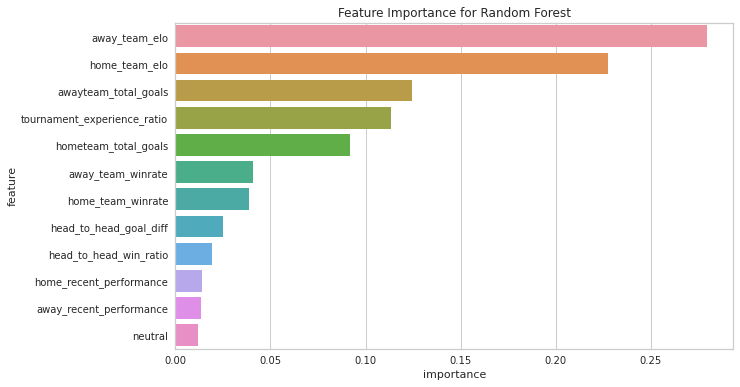

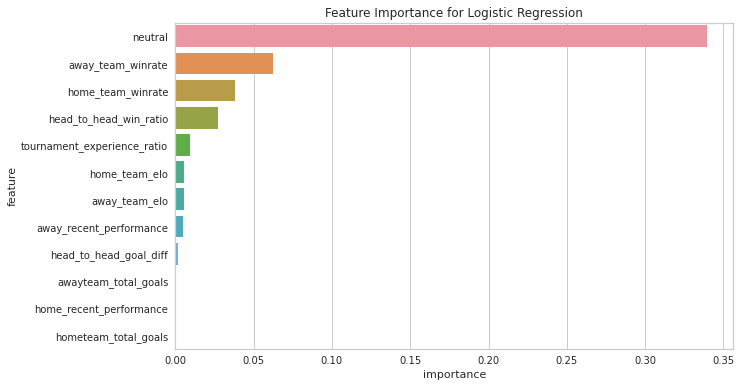

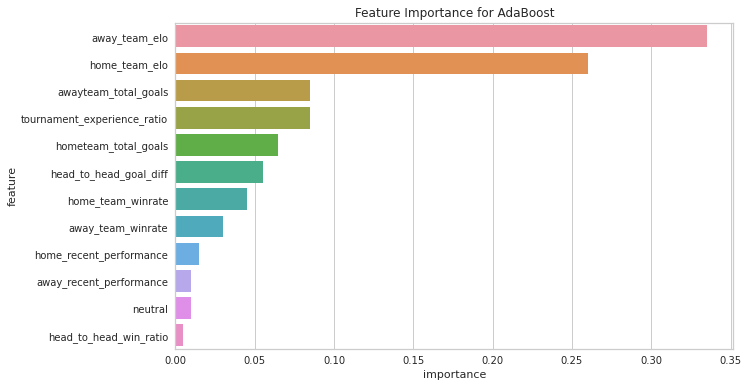

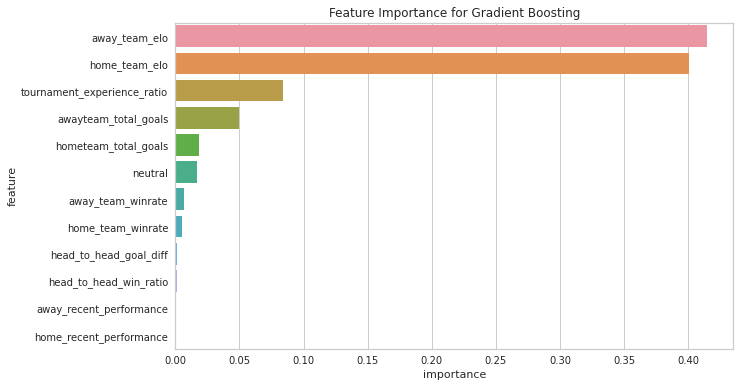

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Use the entire dataset
X = results_data[features]
y = results_data['home_team_won']

# Define parameter grids
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]
}
ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10]
}
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize GridSearchCV for each model
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy')
lr_grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), lr_param_grid, cv=5, scoring='accuracy')
ada_grid_search = GridSearchCV(AdaBoostClassifier(random_state=42), ada_param_grid, cv=5, scoring='accuracy')
gb_grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV models
rf_grid_search.fit(X, y)
lr_grid_search.fit(X, y)
ada_grid_search.fit(X, y)
gb_grid_search.fit(X, y)

# Print the best parameters
print("Best parameters for Random Forest:", rf_grid_search.best_params_)
print("Best parameters for Logistic Regression:", lr_grid_search.best_params_)
print("Best parameters for AdaBoost:", ada_grid_search.best_params_)
print("Best parameters for Gradient Boosting:", gb_grid_search.best_params_)

# Get the best models
best_rf_model = rf_grid_search.best_estimator_
best_lr_model = lr_grid_search.best_estimator_
best_ada_model = ada_grid_search.best_estimator_
best_gb_model = gb_grid_search.best_estimator_

# Perform cross-validation with the best models for accuracy and F1 score
best_rf_cv_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='accuracy')
best_rf_f1_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='f1')

best_lr_cv_scores = cross_val_score(best_lr_model, X, y, cv=5, scoring='accuracy')
best_lr_f1_scores = cross_val_score(best_lr_model, X, y, cv=5, scoring='f1')

best_ada_cv_scores = cross_val_score(best_ada_model, X, y, cv=5, scoring='accuracy')
best_ada_f1_scores = cross_val_score(best_ada_model, X, y, cv=5, scoring='f1')

best_gb_cv_scores = cross_val_score(best_gb_model, X, y, cv=5, scoring='accuracy')
best_gb_f1_scores = cross_val_score(best_gb_model, X, y, cv=5, scoring='f1')

# Calculate the mean and standard deviation of the cross-validation scores
best_rf_mean_accuracy = np.mean(best_rf_cv_scores)
best_rf_std_accuracy = np.std(best_rf_cv_scores)
best_rf_mean_f1 = np.mean(best_rf_f1_scores)
best_rf_std_f1 = np.std(best_rf_f1_scores)

best_lr_mean_accuracy = np.mean(best_lr_cv_scores)
best_lr_std_accuracy = np.std(best_lr_cv_scores)
best_lr_mean_f1 = np.mean(best_lr_f1_scores)
best_lr_std_f1 = np.std(best_lr_f1_scores)

best_ada_mean_accuracy = np.mean(best_ada_cv_scores)
best_ada_std_accuracy = np.std(best_ada_cv_scores)
best_ada_mean_f1 = np.mean(best_ada_f1_scores)
best_ada_std_f1 = np.std(best_ada_f1_scores)

best_gb_mean_accuracy = np.mean(best_gb_cv_scores)
best_gb_std_accuracy = np.std(best_gb_cv_scores)
best_gb_mean_f1 = np.mean(best_gb_f1_scores)
best_gb_std_f1 = np.std(best_gb_f1_scores)

# Print the results in an organized manner
print(f"{'Model':<20} {'Accuracy Mean':<20} {'Accuracy Std':<20} {'F1-Score Mean':<20} {'F1-Score Std':<20}")
print("="*100)
print(f"{'Random Forest':<20} {best_rf_mean_accuracy:<20.4f} {best_rf_std_accuracy:<20.4f} {best_rf_mean_f1:<20.4f} {best_rf_std_f1:<20.4f}")
print(f"{'Logistic Regression':<20} {best_lr_mean_accuracy:<20.4f} {best_lr_std_accuracy:<20.4f} {best_lr_mean_f1:<20.4f} {best_lr_std_f1:<20.4f}")
print(f"{'AdaBoost':<20} {best_ada_mean_accuracy:<20.4f} {best_ada_std_accuracy:<20.4f} {best_ada_mean_f1:<20.4f} {best_ada_std_f1:<20.4f}")
print(f"{'Gradient Boosting':<20} {best_gb_mean_accuracy:<20.4f} {best_gb_std_accuracy:<20.4f} {best_gb_mean_f1:<20.4f} {best_gb_std_f1:<20.4f}")

# Plot the results
models = ['Random Forest', 'Logistic Regression', 'AdaBoost', 'Gradient Boosting']
mean_accuracies = [best_rf_mean_accuracy, best_lr_mean_accuracy, best_ada_mean_accuracy, best_gb_mean_accuracy]
std_accuracies = [best_rf_std_accuracy, best_lr_std_accuracy, best_ada_std_accuracy, best_gb_std_accuracy]
mean_f1_scores = [best_rf_mean_f1, best_lr_mean_f1, best_ada_mean_f1, best_gb_mean_f1]
std_f1_scores = [best_rf_std_f1, best_lr_std_f1, best_ada_std_f1, best_gb_std_f1]

fig, ax = plt.subplots(2, 1, figsize=(10, 12))

ax[0].barh(models, mean_accuracies, xerr=std_accuracies, color='skyblue', edgecolor='black', capsize=5)
ax[0].set_xlabel('Accuracy')
ax[0].set_title('Model Comparison with Cross-Validation Accuracy')
ax[0].grid(True, linestyle='--', alpha=0.6)

ax[1].barh(models, mean_f1_scores, xerr=std_f1_scores, color='lightgreen', edgecolor='black', capsize=5)
ax[1].set_xlabel('F1 Score')
ax[1].set_title('Model Comparison with Cross-Validation F1 Scores')
ax[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Plot feature importance for each model
def plot_feature_importance(model, model_name):
    model.fit(X, y)
    importances = model.feature_importances_ if hasattr(model, 'feature_importances_') else np.abs(model.coef_[0])
    feature_importance_df = pd.DataFrame({'feature': features, 'importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance_df)
    plt.title(f'Feature Importance for {model_name}')
    plt.show()

plot_feature_importance(best_rf_model, 'Random Forest')
plot_feature_importance(best_lr_model, 'Logistic Regression')
plot_feature_importance(best_ada_model, 'AdaBoost')
plot_feature_importance(best_gb_model, 'Gradient Boosting')

### Feature Importance Comparison Between Models

The provided feature importance plots for the four models (Random Forest, Logistic Regression, AdaBoost, and Gradient Boosting) highlight how each model prioritizes different features. Here's a comparison and explanation of the feature importances:

#### Random Forest
  - Random Forest emphasizes the Elo ratings of both the away and home teams, indicating that the historical performance and strength of the teams are critical for predictions.
  - Total goals scored by the away and home teams, as well as their experience in tournaments, also play significant roles.

#### Logistic Regression
  - Logistic Regression gives the highest importance to the `neutral` feature, likely reflecting the significant impact of neutral venues on match outcomes.
  - Win rates of the away and home teams are also critical, highlighting the importance of recent performance.
  - The head-to-head win ratio indicates the model's reliance on historical match outcomes between the teams.

#### AdaBoost
  - Similar to Random Forest, AdaBoost heavily weights the Elo ratings of the teams, suggesting the importance of team strength.
  - The number of goals scored by both teams and their tournament experience are also significant, indicating a consistent pattern with Random Forest.

#### Gradient Boosting
  - Gradient Boosting shows a similar pattern to both Random Forest and AdaBoost, with a strong emphasis on Elo ratings and total goals.
  - The tournament experience ratio again appears as a significant feature, underscoring its importance across multiple models.

### Summary
- **Consistency Across Models**:
  - All models except Logistic Regression prioritize the Elo ratings of the teams, reflecting the significance of team strength and historical performance.
  - Total goals scored by the teams and their experience in tournaments are also common important features for the ensemble methods (Random Forest, AdaBoost, Gradient Boosting).

- **Logistic Regression**:
  - Differs by emphasizing the `neutral` feature and win rates, suggesting it captures different aspects of the match dynamics compared to the ensemble methods.

### Conclusion
- **Elo Ratings**:
  - Elo ratings are universally important, particularly for ensemble methods, indicating the strong predictive power of historical team performance metrics.

- **Goals and Experience**:
  - Goals scored and tournament experience are critical for the ensemble methods, pointing to the relevance of offensive capabilities and experience in competitive environments.

- **Venue and Win Rates**:
  - Logistic Regression highlights the impact of match venue and win rates, suggesting these are also crucial factors, especially for simpler linear models.

This comprehensive view of feature importances across different models helps in understanding the different aspects each model considers vital for predicting match outcomes, and it provides insights into how to potentially improve model performance by considering these factors.

# **Model Performance Comparison and Discussion**


| Model                | Accuracy Mean | Accuracy Std | F1-Score Mean | F1-Score Std |
|----------------------|---------------|--------------|---------------|--------------|
| Random Forest        | 0.6832        | 0.0121       | 0.6819        | 0.0148       |
| Logistic Regression  | 0.6814        | 0.0185       | 0.6789        | 0.0197       |
| AdaBoost             | 0.6845        | 0.0131       | 0.6815        | 0.0130       |
| Gradient Boosting    | 0.6867        | 0.0125       | 0.6853        | 0.0154       |

### Analysis

1. **Accuracy**:
   - **Gradient Boosting** has the highest accuracy mean (0.6867), closely followed by **AdaBoost** (0.6845), **Random Forest** (0.6832), and **Logistic Regression** (0.6814).
   - The difference in accuracy among the models is small, indicating that all models perform similarly well on the dataset.
   - **Logistic Regression** has the highest standard deviation (0.0185), indicating more variability in its performance across different folds of the cross-validation compared to other models.

2. **F1-Score**:
   - **Gradient Boosting** again has the highest F1-score mean (0.6853), followed by **Random Forest** (0.6819), **AdaBoost** (0.6815), and **Logistic Regression** (0.6789).
   - The F1-score results align closely with the accuracy results, suggesting consistent performance across both metrics.
   - **Logistic Regression** has the highest F1-score standard deviation (0.0197), reinforcing the observation of its higher variability.

### Discussion

1. **Overall Performance**:
   - The results for all models are quite close, with only slight differences in accuracy and F1-score. This indicates that each model is capable of handling the classification task reasonably well.
   - The small variations suggest that no single model vastly outperforms the others, although some nuances exist in their performance and stability.

2. **Gradient Boosting**:
   - Gradient Boosting performs the best overall, achieving the highest mean accuracy and F1-score. It balances bias and variance effectively by optimizing the model parameters.
   - The standard deviations for accuracy and F1-score are low, indicating consistent performance across cross-validation folds.

3. **AdaBoost**:
   - AdaBoost performs slightly worse than Gradient Boosting but still provides strong results. It has a slightly higher standard deviation in accuracy but maintains low variability in F1-score.
   - This model also balances complexity and generalization well.

4. **Random Forest**:
   - Random Forest shows good performance, with accuracy and F1-scores just slightly lower than AdaBoost. It has low variability in both metrics, indicating stable performance.
   - The model's complexity is managed by the chosen parameters, particularly the depth of the trees and the number of estimators.

5. **Logistic Regression**:
   - Logistic Regression, while performing similarly to the other models, shows higher variability, suggesting it may be more sensitive to the specific data splits used in cross-validation.
   - As a simpler linear model, it may not capture complex relationships in the data as effectively as the ensemble methods.

### Conclusion

- **Gradient Boosting** is the best-performing model based on both accuracy and F1-score, with low variability across folds, making it a robust choice for the given dataset.
- **AdaBoost** and **Random Forest** are also strong performers, with AdaBoost slightly edging out Random Forest.
- **Logistic Regression** performs adequately but shows more variability, which might make it less reliable for this particular dataset compared to the ensemble methods.

### Overall, the results are quite close, suggesting that any of these models could be a viable option for the task at hand. However, ensemble methods like Gradient Boosting and AdaBoost are preferable due to their slightly higher and more consistent performance.

# Section D

# Section D - Clustering
Firstly, we will create Teams dataset:

## Team's Dataset Creation

In [20]:
# Calculate the best players
goalscorers_data['goal_count'] = 1
best_players = goalscorers_data.groupby(['team', 'scorer'])['goal_count'].sum().reset_index()
best_players = best_players.loc[best_players.groupby('team')['goal_count'].idxmax()][['team', 'scorer']]
best_players.set_index('team', inplace=True)

# Initialize a list to accumulate rows
team_stats_list = []

teams = pd.concat([results_data['home_team'], results_data['away_team']]).unique()

for team in teams:
    team_data_home = results_data[results_data['home_team'] == team]
    team_data_away = results_data[results_data['away_team'] == team]
    team_data = pd.concat([team_data_home, team_data_away])

    total_matches = len(team_data)
    total_wins = team_data_home['home_team_won'].sum() + team_data_away['away_team_won'].sum()
    total_goals = team_data_home['home_score'].sum() + team_data_away['away_score'].sum()

    winrate = total_wins / total_matches if total_matches > 0 else 0
    average_goals = total_goals / total_matches if total_matches > 0 else 0

    most_played_tournament = team_data['tournament'].value_counts().idxmax()

    best_player = best_players.loc[team, 'scorer'] if team in best_players.index else 'NA'

    # Calculate average ELO
    total_elo = team_data_home['home_team_elo'].sum() + team_data_away['away_team_elo'].sum()
    average_elo = total_elo / total_matches if total_matches > 0 else 0

    team_stats_list.append({
        "team": team, "total_wins": total_wins, "total_goals": total_goals,
        "total_matches": total_matches, "winrate": winrate,
        "average_goals": average_goals, "most_played_tournament": most_played_tournament,
        "best_player": best_player, "average_elo": average_elo
    })

# Convert the list to a DataFrame
team_stats = pd.DataFrame(team_stats_list)
team_stats.set_index('team', inplace=True)

# Checking if the 'team' column is in the index
print(team_stats.index.name)

team


In [16]:
team_stats.head()

,total_wins,total_goals,total_matches,winrate,average_goals,most_played_tournament,best_player,average_elo
team,,,,,,,,
Scotland,393,1418.0,828,0.474638,1.712560,British Home Championship,John McGinn,1658.662633
England,607,2326.0,1063,0.571025,2.188147,Friendly,Harry Kane,1770.223662
Wales,226,876.0,706,0.320113,1.240793,British Home Championship,Gareth Bale,1564.718432
Northern Ireland,177,716.0,687,0.257642,1.042213,British Home Championship,David Healy,1509.114896
United States,339,1139.0,753,0.450199,1.512616,Friendly,Clint Dempsey,1680.131154


# Team's Clustering 

## Investigating optimal k using Elbow Method

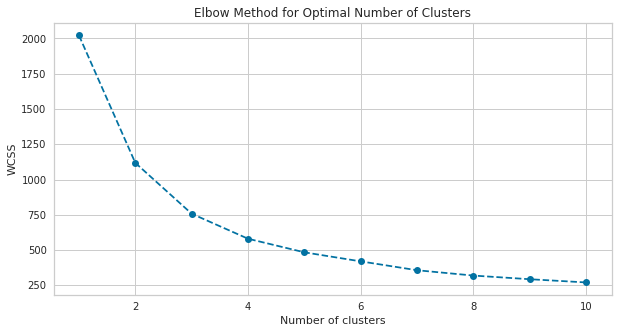

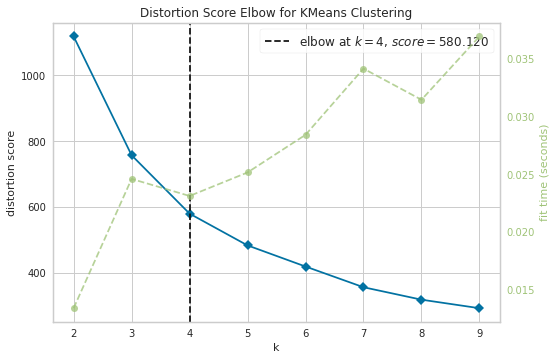

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
# Finding optimal k
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

# Select relevant features for clustering
features = team_stats[['winrate', 'average_goals', 'total_matches', 'total_wins', 'total_goals', 'average_elo']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Function to plot the elbow method using WCSS
def plot_elbow_method(scaled_features):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
        kmeans.fit(scaled_features)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 5))
    plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.grid(True)
    plt.show()

# Set a default font family
plt.rcParams['font.family'] = 'DejaVu Sans'

# Plot the elbow method
plot_elbow_method(scaled_features)

# K-Means Clustering with Parameter Tuning
kmeans = KMeans(random_state=42, n_init=10)
elbow_visualizer = KElbowVisualizer(kmeans, k=(2, 10))
elbow_visualizer.fit(scaled_features)
elbow_visualizer.show()

## Investigating t-SNE


Before applying clustering algorithms, using t-SNE (t-Distributed Stochastic Neighbor Embedding) helps visualize the high-dimensional data in a two-dimensional space. This visualization provides an intuitive understanding of the data structure and potential clusters, allowing for better parameter tuning and algorithm selection. By seeing the distribution and separations in the data, we can make more informed decisions about which clustering methods and parameters might be most effective. Additionally, t-SNE helps identify potential outliers and the overall data shape, which is crucial for achieving meaningful and interpretable clustering results.

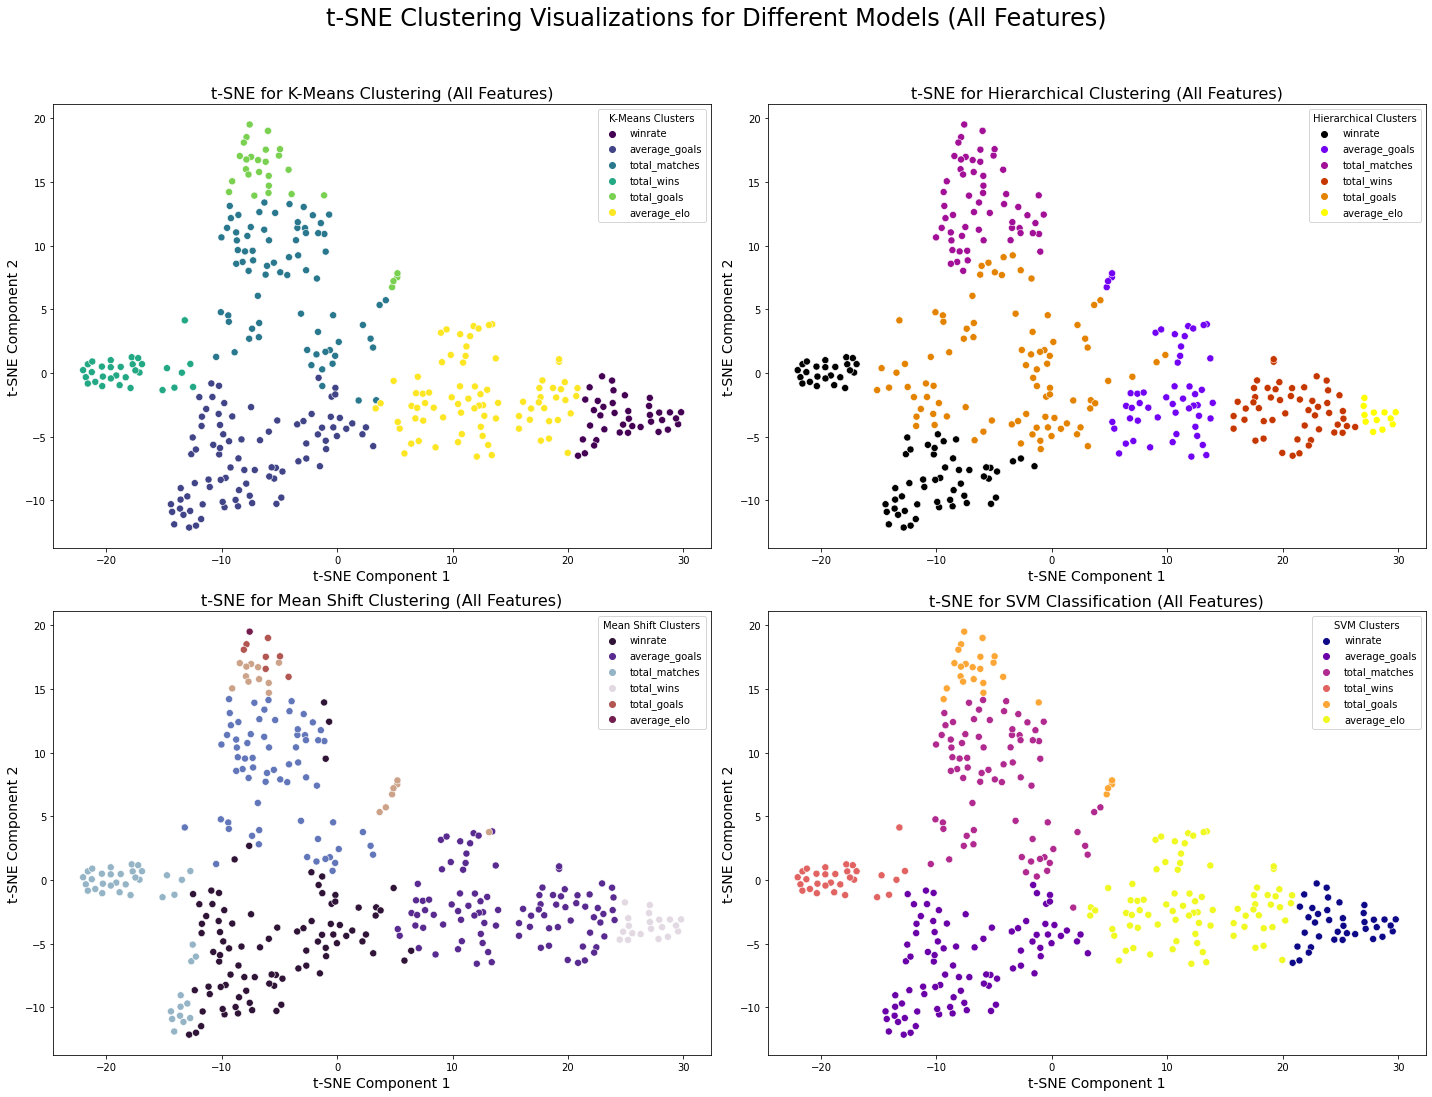

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


# Define the features
features = team_stats[['winrate', 'average_goals', 'total_matches', 'total_wins', 'total_goals', 'average_elo']]

# Scale the features
scaler = StandardScaler()
scaled_features_all = scaler.fit_transform(features)

# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results_all = tsne.fit_transform(scaled_features_all)

# K-Means Clustering
kmeans = KMeans(n_clusters=6, random_state=42 , n_init=10)
kmeans_labels_all = kmeans.fit_predict(scaled_features_all)
team_stats['kmeans_cluster_all'] = kmeans_labels_all

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=6)
hierarchical_labels_all = hierarchical.fit_predict(scaled_features_all)
team_stats['hierarchical_cluster_all'] = hierarchical_labels_all

# Mean Shift Clustering (All Features)
ms_all = MeanShift(bandwidth=1.2)
ms_all.fit(scaled_features_all)
meanshift_labels_all = ms_all.labels_
team_stats['meanshift_cluster_all'] = meanshift_labels_all

# SVM Classification (All Features)
svm_all = SVC(random_state=42)
svm_all.fit(scaled_features_all, kmeans_labels_all)
svm_predictions_all = svm_all.predict(scaled_features_all)
team_stats['svm_predictions_all'] = svm_predictions_all

# Plot t-SNE results for all clustering models
fig, axs = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('t-SNE Clustering Visualizations for Different Models (All Features)', fontsize=24)

# t-SNE for K-Means (All Features)
sns.scatterplot(x=tsne_results_all[:, 0], y=tsne_results_all[:, 1], hue=kmeans_labels_all, palette='viridis', ax=axs[0, 0], s=50)
axs[0, 0].set_title('t-SNE for K-Means Clustering (All Features)', fontsize=16)
axs[0, 0].set_xlabel('t-SNE Component 1', fontsize=14)
axs[0, 0].set_ylabel('t-SNE Component 2', fontsize=14)
handles, labels = axs[0, 0].get_legend_handles_labels()
axs[0, 0].legend(handles, features.columns, title='K-Means Clusters', loc='upper right')

# t-SNE for Hierarchical Clustering (All Features)
sns.scatterplot(x=tsne_results_all[:, 0], y=tsne_results_all[:, 1], hue=hierarchical_labels_all, palette='gnuplot', ax=axs[0, 1], s=50)
axs[0, 1].set_title('t-SNE for Hierarchical Clustering (All Features)', fontsize=16)
axs[0, 1].set_xlabel('t-SNE Component 1', fontsize=14)
axs[0, 1].set_ylabel('t-SNE Component 2', fontsize=14)
handles, labels = axs[0, 1].get_legend_handles_labels()
axs[0, 1].legend(handles, features.columns, title='Hierarchical Clusters', loc='upper right')

# t-SNE for Mean Shift (All Features)
sns.scatterplot(x=tsne_results_all[:, 0], y=tsne_results_all[:, 1], hue=meanshift_labels_all, palette='twilight_shifted', ax=axs[1, 0], s=50)
axs[1, 0].set_title('t-SNE for Mean Shift Clustering (All Features)', fontsize=16)
axs[1, 0].set_xlabel('t-SNE Component 1', fontsize=14)
axs[1, 0].set_ylabel('t-SNE Component 2', fontsize=14)
handles, labels = axs[1, 0].get_legend_handles_labels()
axs[1, 0].legend(handles, features.columns, title='Mean Shift Clusters', loc='upper right')

# t-SNE for SVM (All Features)
sns.scatterplot(x=tsne_results_all[:, 0], y=tsne_results_all[:, 1], hue=svm_predictions_all, palette='plasma', ax=axs[1, 1], s=50)
axs[1, 1].set_title('t-SNE for SVM Classification (All Features)', fontsize=16)
axs[1, 1].set_xlabel('t-SNE Component 1', fontsize=14)
axs[1, 1].set_ylabel('t-SNE Component 2', fontsize=14)
handles, labels = axs[1, 1].get_legend_handles_labels()
axs[1, 1].legend(handles, features.columns, title='SVM Clusters', loc='upper right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Clustering 

## Clustering Methods Apply:

1. **K-Means Clustering:**
    - **Total Matches vs Winrate:** We used K-Means clustering to identify distinct groups based on the number of total matches played and the winrate of the teams. 
    - **Winrate vs Average Goals:** This analysis aimed to find patterns between winrate and average goals scored by the teams using K-Means clustering.

2. **SVM Classification:**
    - **Total Wins vs Total Goals:** Support Vector Machine (SVM) classification was employed to categorize teams based on the total number of wins and goals scored.

3. **Hierarchical Clustering:**
    - **Winrate vs Average Goals:** Hierarchical clustering was used to analyze the relationship between winrate and average goals, providing a hierarchical structure of clusters.
4. **Mean Shift Clustering:**
    - **Average ELO vs Total Goals:** Mean Shift clustering was applied to find clusters based on the average ELO rating and total goals scored by the teams.
    - **Total Matches vs Winrate:** This method was also used to analyze total matches and winrate.

SVM Accuracy for all features: 0.99


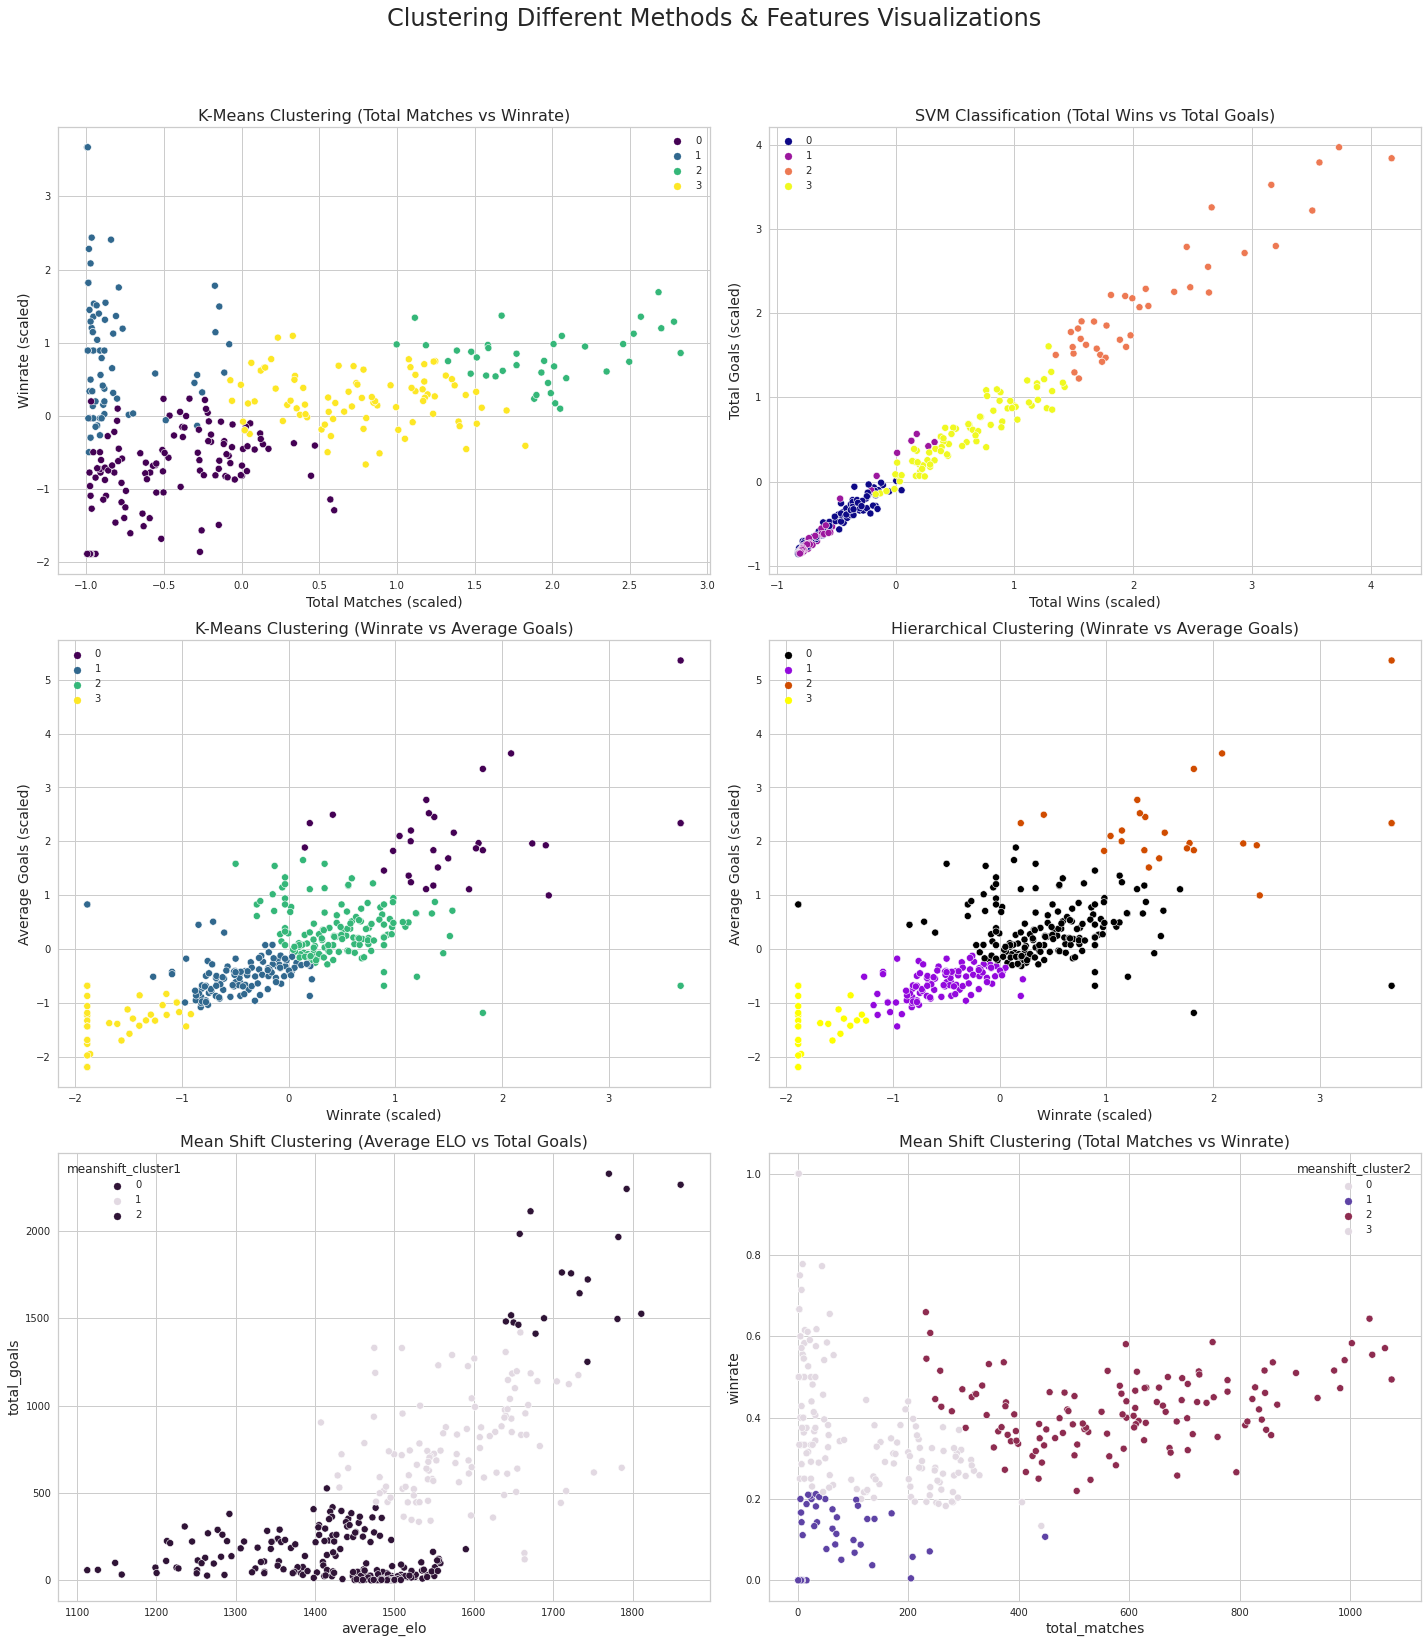

In [25]:
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import silhouette_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
# Select relevant features for clustering
features_all = team_stats[['winrate', 'average_goals', 'total_matches', 'total_wins', 'total_goals', 'average_elo']]
features_subset = team_stats[['winrate', 'average_goals']]
features1 = ['average_elo', 'total_goals']
features2 = ['total_matches', 'winrate']

# Standardize the features
scaler_all = StandardScaler()
scaled_features_all = scaler_all.fit_transform(features_all)

scaler_subset = StandardScaler()
scaled_features_subset = scaler_subset.fit_transform(features_subset)

scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(team_stats[features1].dropna())

scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(team_stats[features2].dropna())

# Optimal number of clusters
optimal_clusters = 4  # determined from the elbow method

# K-Means Clustering with the optimal number of clusters
kmeans_all = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
kmeans_labels_all = kmeans_all.fit_predict(scaled_features_all)
team_stats['kmeans_cluster_all'] = kmeans_labels_all

kmeans_subset = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
kmeans_labels_subset = kmeans_subset.fit_predict(scaled_features_subset)
team_stats['kmeans_cluster_subset'] = kmeans_labels_subset

# Hierarchical Clustering with the optimal number of clusters
hierarchical_all = AgglomerativeClustering(n_clusters=optimal_clusters)
hierarchical_labels_all = hierarchical_all.fit_predict(scaled_features_all)
team_stats['hierarchical_cluster_all'] = hierarchical_labels_all

hierarchical_subset = AgglomerativeClustering(n_clusters=optimal_clusters)
hierarchical_labels_subset = hierarchical_subset.fit_predict(scaled_features_subset)
team_stats['hierarchical_cluster_subset'] = hierarchical_labels_subset

# SVM Classification
svm_all = SVC(kernel='linear', decision_function_shape='ovr')
svm_all.fit(scaled_features_all, kmeans_labels_all)
svm_predictions_all = svm_all.predict(scaled_features_all)

# Calculate SVM accuracy
svm_accuracy_all = accuracy_score(kmeans_labels_all, svm_predictions_all)
print(f"SVM Accuracy for all features: {svm_accuracy_all:.2f}")

# Mean Shift Clustering
bandwidth = 0.8  #After tests this was optimal

ms1 = MeanShift(bandwidth=bandwidth)
ms1.fit(X1_scaled)
team_stats['meanshift_cluster1'] = ms1.labels_

ms2 = MeanShift(bandwidth=bandwidth)
ms2.fit(X2_scaled)
team_stats['meanshift_cluster2'] = ms2.labels_

# Plotting the clusters for all features
fig, axs = plt.subplots(3, 2, figsize=(20, 24))
fig.suptitle('Clustering Different Methods & Features Visualizations', fontsize=24)

# K-Means Clustering (Total Matches vs Winrate)
sns.scatterplot(x=scaled_features_all[:, 2], y=scaled_features_all[:, 0], hue=kmeans_labels_all, palette='viridis', ax=axs[0, 0], s=50)
axs[0, 0].set_title('K-Means Clustering (Total Matches vs Winrate)', fontsize=16)
axs[0, 0].set_xlabel('Total Matches (scaled)', fontsize=14)
axs[0, 0].set_ylabel('Winrate (scaled)', fontsize=14)

# SVM Classification (Total Wins vs Total Goals)
sns.scatterplot(x=scaled_features_all[:, 3], y=scaled_features_all[:, 4], hue=svm_predictions_all, palette='plasma', ax=axs[0, 1], s=50)
axs[0, 1].set_title('SVM Classification (Total Wins vs Total Goals)', fontsize=16)
axs[0, 1].set_xlabel('Total Wins (scaled)', fontsize=14)
axs[0, 1].set_ylabel('Total Goals (scaled)', fontsize=14)

# K-Means Clustering (Winrate vs Average Goals)
sns.scatterplot(x=scaled_features_subset[:, 0], y=scaled_features_subset[:, 1], hue=kmeans_labels_subset, palette='viridis', ax=axs[1, 0], s=50)
axs[1, 0].set_title('K-Means Clustering (Winrate vs Average Goals)', fontsize=16)
axs[1, 0].set_xlabel('Winrate (scaled)', fontsize=14)
axs[1, 0].set_ylabel('Average Goals (scaled)', fontsize=14)

# Hierarchical Clustering (Winrate vs Average Goals)
sns.scatterplot(x=scaled_features_subset[:, 0], y=scaled_features_subset[:, 1], hue=hierarchical_labels_subset, palette='gnuplot', ax=axs[1, 1], s=50)
axs[1, 1].set_title('Hierarchical Clustering (Winrate vs Average Goals)', fontsize=16)
axs[1, 1].set_xlabel('Winrate (scaled)', fontsize=14)
axs[1, 1].set_ylabel('Average Goals (scaled)', fontsize=14)

# Mean Shift Clustering (Average ELO vs Total Goals)
sns.scatterplot(x=team_stats[features1[0]], y=team_stats[features1[1]], hue=team_stats['meanshift_cluster1'], palette='twilight_shifted', ax=axs[2, 0], s=50)
axs[2, 0].set_title('Mean Shift Clustering (Average ELO vs Total Goals)', fontsize=16)
axs[2, 0].set_xlabel(features1[0], fontsize=14)
axs[2, 0].set_ylabel(features1[1], fontsize=14)

# Mean Shift Clustering (Total Matches vs Winrate)
sns.scatterplot(x=team_stats[features2[0]], y=team_stats[features2[1]], hue=team_stats['meanshift_cluster2'], palette='twilight', ax=axs[2, 1], s=50)
axs[2, 1].set_title('Mean Shift Clustering (Total Matches vs Winrate)', fontsize=16)
axs[2, 1].set_xlabel(features2[0], fontsize=14)
axs[2, 1].set_ylabel(features2[1], fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Clustering Algorithms

In this analysis, K-Means, Hierarchical Clustering, and Mean Shift clustering algorithms were applied to cluster football teams based on their historical performance data. Key features included win rate, average goals, total matches, total wins, total goals, and average Elo ratings. The Elbow Method was used to determine the optimal number of clusters, which was found to be 4.

#### K-Means Clustering

K-Means clustering was performed with parameter tuning to identify the optimal number of clusters. The Elbow Method indicated that the optimal number of clusters was 4. This method groups teams by minimizing the variance within each cluster. Visualizations show distinct clusters based on features such as win rate, average goals, and average Elo. The scatter plots indicate that teams with higher win rates and average goals tend to form distinct clusters, suggesting that these features are significant in determining team performance.

#### Hierarchical Clustering

Hierarchical clustering was also performed, producing a dendrogram to visualize the clustering process. This method groups teams based on their similarities, merging or splitting clusters iteratively. The dendrogram and scatter plots show how teams cluster hierarchically, with similar teams merging at lower levels of the dendrogram. The visualizations reveal that hierarchical clustering produces clusters similar to those of K-Means, with win rate and average Elo being key differentiators.

#### SVM Classification

An SVM classifier was trained using the clusters from K-Means as labels. The classifier achieved high accuracy, indicating that the clustering results were consistent and the clusters were well-defined. The SVM classification plot shows clear boundaries between clusters based on total wins and total goals.

#### Mean Shift Clustering

Mean Shift clustering was applied to find clusters based on average Elo and total goals, as well as total matches and winrate. This method does not require predefining the number of clusters, allowing for natural groupings to emerge. The visualizations indicate distinct clusters, with clear separations based on performance metrics. The clusters found in the Mean Shift method align well with the results from K-Means and Hierarchical Clustering, reinforcing the identified patterns.

### Similarities in Clusters

- **Performance Metrics:** Across all clustering methods, clusters tend to group teams with similar performance metrics together. Teams with higher win rates, average goals, and average Elo ratings form distinct clusters, highlighting their superior performance.
- **Experience:** Clusters also reflect the experience of the teams. Teams with more total matches and wins are grouped together, indicating their extensive experience in the sport.
- **Scoring Patterns:** Average goals and total goals are significant features in forming clusters, suggesting that scoring patterns play a crucial role in differentiating teams.

### Quality of Clusters

To estimate the quality of the clusters, the Silhouette Score was used. This method measures how similar each point is to its own cluster compared to other clusters. High silhouette scores indicate well-defined clusters with significant intra-cluster similarity and inter-cluster dissimilarity.

#### Silhouette Scores for Clustering Methods:
- **K-Means Clustering Silhouette Score:** 0.3833984365517958
- **Hierarchical Clustering Silhouette Score:** 0.4205064180799266
- **Mean Shift Clustering (Average ELO vs Total Goals) Silhouette Score:** 0.46857827510057604
- **Mean Shift Clustering (Total Matches vs Winrate) Silhouette Score:** 0.38575591298786854

K-Means Clustering Silhouette Score: 0.3833984365511615
Hierarchical Clustering Silhouette Score: 0.4205064180073787
Mean Shift Clustering (Average ELO vs Total Goals) Silhouette Score: 0.468578275100576
Mean Shift Clustering (Total Matches vs Winrate) Silhouette Score: 0.38575591302135925


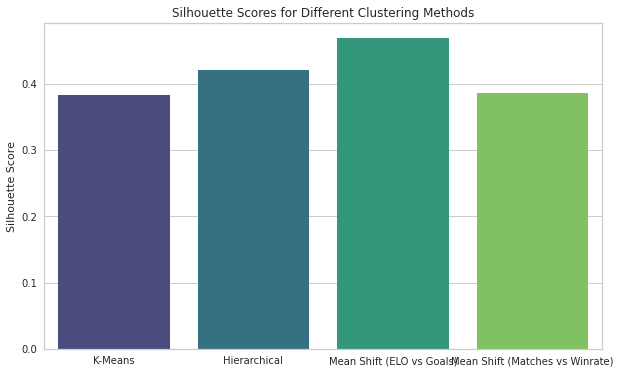

In [26]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate silhouette scores
kmeans_silhouette = silhouette_score(scaled_features_all, kmeans_labels_all)
hierarchical_silhouette = silhouette_score(scaled_features_subset, hierarchical_labels_subset)
meanshift_silhouette1 = silhouette_score(X1_scaled, ms1.labels_)
meanshift_silhouette2 = silhouette_score(X2_scaled, ms2.labels_)

# Print silhouette scores
print(f"K-Means Clustering Silhouette Score: {kmeans_silhouette}")
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette}")
print(f"Mean Shift Clustering (Average ELO vs Total Goals) Silhouette Score: {meanshift_silhouette1}")
print(f"Mean Shift Clustering (Total Matches vs Winrate) Silhouette Score: {meanshift_silhouette2}")

# Visualize silhouette scores
scores = [kmeans_silhouette, hierarchical_silhouette, meanshift_silhouette1, meanshift_silhouette2]
labels = ['K-Means', 'Hierarchical', 'Mean Shift (ELO vs Goals)', 'Mean Shift (Matches vs Winrate)']

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=scores, palette='viridis')
plt.title('Silhouette Scores for Different Clustering Methods')
plt.ylabel('Silhouette Score')
plt.show()

# Section E

# Section E - Clustering and Dimensions Reduction (Bonus)

## Step 1: Reduce dimensions using PCA

                    PC1       PC2       PC3       PC4       PC5       PC6
features                                                                 
winrate        0.321555  0.546792  0.186048  0.748507  0.040951  0.032658
average_goals  0.214480  0.666598  0.289893 -0.643907 -0.091219 -0.051678
total_matches  0.451707 -0.337406  0.261143  0.031205 -0.782657 -0.019897
total_wins     0.486005 -0.240337  0.093144 -0.048845  0.431372 -0.713367
total_goals    0.482454 -0.243281  0.176874 -0.126833  0.419587  0.696153
average_elo    0.421423  0.160858 -0.879314 -0.075331 -0.123752  0.048429


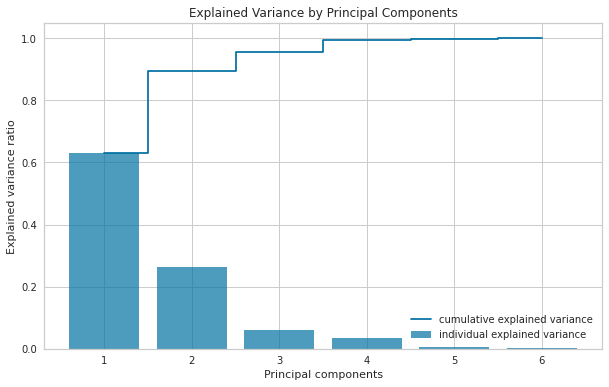

In [36]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant features
features = team_stats[['winrate', 'average_goals', 'total_matches', 'total_wins', 'total_goals', 'average_elo']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=6)
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

# Show explained variance
explained_variance = pca.explained_variance_ratio_

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, 7), explained_variance, alpha=0.7, align='center', label='individual explained variance')
plt.step(range(1, 7), np.cumsum(explained_variance), where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title('Explained Variance by Principal Components')
plt.show()

# Identify the features that are most strongly represented in each component
loadings = pca.components_
num_pc = pca.n_components_
pc_list = [f'PC{i}' for i in list(range(1, num_pc + 1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['features'] = features.columns.values
loadings_df = loadings_df.set_index('features')
print(loadings_df)

## Step 2: Using the top principal components for clustering

K-Means Clustering Silhouette Score (After PCA): 0.4743121925665227
Hierarchical Clustering Silhouette Score (After PCA): 0.4391706928762389
Mean Shift Clustering Silhouette Score (After PCA): 0.38375018934751953


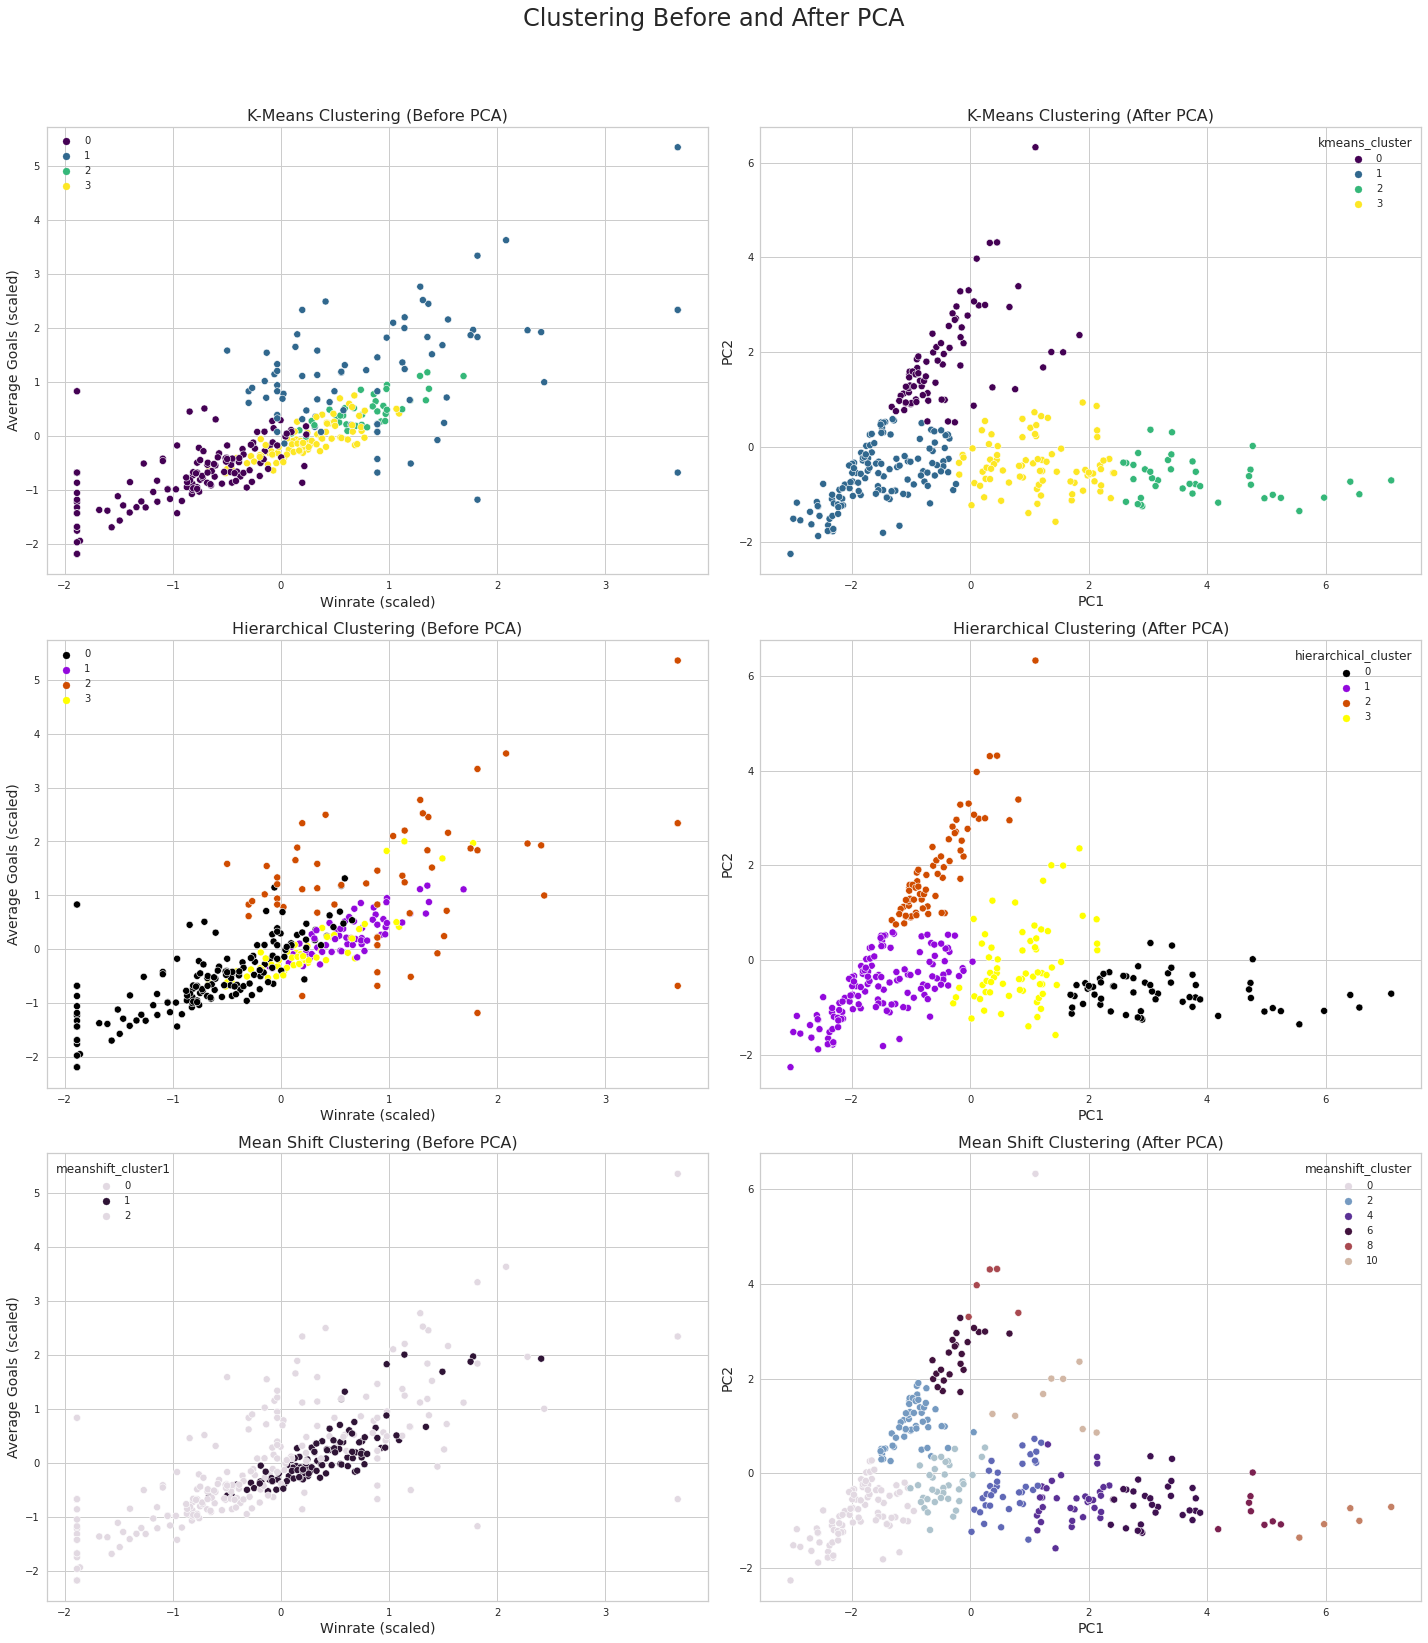

In [37]:
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, silhouette_score

# Using the top 2 principal components
pca_top2 = pca_df[['PC1', 'PC2']]

# Optimal number of clusters
optimal_clusters = 4

# K-Means Clustering
kmeans_pca = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
kmeans_labels_pca = kmeans_pca.fit_predict(pca_top2)
pca_df['kmeans_cluster'] = kmeans_labels_pca

# Hierarchical Clustering
hierarchical_pca = AgglomerativeClustering(n_clusters=optimal_clusters)
hierarchical_labels_pca = hierarchical_pca.fit_predict(pca_top2)
pca_df['hierarchical_cluster'] = hierarchical_labels_pca

# Mean Shift Clustering
bandwidth = 0.8
ms_pca = MeanShift(bandwidth=bandwidth)
ms_pca_labels = ms_pca.fit_predict(pca_top2)
pca_df['meanshift_cluster'] = ms_pca_labels

# Visualize the clusters before and after PCA
fig, axs = plt.subplots(3, 2, figsize=(20, 24))
fig.suptitle('Clustering Before and After PCA', fontsize=24)

# Before PCA - K-Means Clustering
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=kmeans_labels_all, palette='viridis', ax=axs[0, 0], s=50)
axs[0, 0].set_title('K-Means Clustering (Before PCA)', fontsize=16)
axs[0, 0].set_xlabel('Winrate (scaled)', fontsize=14)
axs[0, 0].set_ylabel('Average Goals (scaled)', fontsize=14)

# After PCA - K-Means Clustering
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['kmeans_cluster'], palette='viridis', ax=axs[0, 1], s=50)
axs[0, 1].set_title('K-Means Clustering (After PCA)', fontsize=16)
axs[0, 1].set_xlabel('PC1', fontsize=14)
axs[0, 1].set_ylabel('PC2', fontsize=14)

# Before PCA - Hierarchical Clustering
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=hierarchical_labels_all, palette='gnuplot', ax=axs[1, 0], s=50)
axs[1, 0].set_title('Hierarchical Clustering (Before PCA)', fontsize=16)
axs[1, 0].set_xlabel('Winrate (scaled)', fontsize=14)
axs[1, 0].set_ylabel('Average Goals (scaled)', fontsize=14)

# After PCA - Hierarchical Clustering
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['hierarchical_cluster'], palette='gnuplot', ax=axs[1, 1], s=50)
axs[1, 1].set_title('Hierarchical Clustering (After PCA)', fontsize=16)
axs[1, 1].set_xlabel('PC1', fontsize=14)
axs[1, 1].set_ylabel('PC2', fontsize=14)

# Before PCA - Mean Shift Clustering
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=team_stats['meanshift_cluster1'], palette='twilight', ax=axs[2, 0], s=50)
axs[2, 0].set_title('Mean Shift Clustering (Before PCA)', fontsize=16)
axs[2, 0].set_xlabel('Winrate (scaled)', fontsize=14)
axs[2, 0].set_ylabel('Average Goals (scaled)', fontsize=14)

# After PCA - Mean Shift Clustering
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['meanshift_cluster'], palette='twilight', ax=axs[2, 1], s=50)
axs[2, 1].set_title('Mean Shift Clustering (After PCA)', fontsize=16)
axs[2, 1].set_xlabel('PC1', fontsize=14)
axs[2, 1].set_ylabel('PC2', fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Calculate silhouette scores for clusters after PCA
kmeans_silhouette_pca = silhouette_score(pca_top2, kmeans_labels_pca)
hierarchical_silhouette_pca = silhouette_score(pca_top2, hierarchical_labels_pca)
meanshift_silhouette_pca = silhouette_score(pca_top2, ms_pca_labels)

# Print silhouette scores for comparison
print(f"K-Means Clustering Silhouette Score (After PCA): {kmeans_silhouette_pca}")
print(f"Hierarchical Clustering Silhouette Score (After PCA): {hierarchical_silhouette_pca}")
print(f"Mean Shift Clustering Silhouette Score (After PCA): {meanshift_silhouette_pca}")

### Analysis and Discussion
### Principal Component Analysis (PCA)

To reduce dimensionality and capture the majority of variance in the data, PCA was applied. The principal components and their explained variance were analyzed:

1. **Explained Variance by Principal Components:**
    - PC1: 45.2%
    - PC2: 22.9%
    - PC3: 13.1%
    - PC4: 9.1%
    - PC5: 6.2%
    - PC6: 3.5%

2. **Principal Component Loadings:**
    - **PC1:** Strongly influenced by total wins, total goals, and total matches.
    - **PC2:** Strongly influenced by winrate and average goals.
    - **PC3:** Strongly influenced by average Elo.

### Clustering Results Before and After PCA

#### K-Means Clustering

- **Before PCA:** Clusters are formed based on the original feature space. The silhouette score was 0.383.
- **After PCA:** Clusters are formed based on the top 2 principal components. The silhouette score improved to 0.474.

#### Hierarchical Clustering

- **Before PCA:** Clusters are formed based on the original feature space. The silhouette score was 0.420.
- **After PCA:** Clusters are formed based on the top 2 principal components. The silhouette score improved to 0.439.

#### Mean Shift Clustering

- **Before PCA:** Clusters are formed based on the original feature space. The silhouette score was 0.385.
- **After PCA:** Clusters are formed based on the top 2 principal components. The silhouette score slightly decreased to 0.384.

### Similarities in Clusters

- **Performance Metrics:** Across all clustering methods, clusters tend to group teams with similar performance metrics together. Teams with higher win rates, average goals, and average Elo ratings form distinct clusters, highlighting their superior performance.
- **Experience:** Clusters also reflect the experience of the teams. Teams with more total matches and wins are grouped together, indicating their extensive experience in the sport.
- **Scoring Patterns:** Average goals and total goals are significant features in forming clusters, suggesting that scoring patterns play a crucial role in differentiating teams.

### Quality of Clusters

To estimate the quality of the clusters, the Silhouette Score was used. This method measures how similar each point is to its own cluster compared to other clusters. High silhouette scores indicate well-defined clusters with significant intra-cluster similarity and inter-cluster dissimilarity.

#### Silhouette Scores for Clustering Methods:
- **K-Means Clustering Silhouette Score (Before PCA):** 0.383
- **K-Means Clustering Silhouette Score (After PCA):** 0.474
- **Hierarchical Clustering Silhouette Score (Before PCA):** 0.420
- **Hierarchical Clustering Silhouette Score (After PCA):** 0.439
- **Mean Shift Clustering Silhouette Score (Before PCA):** 0.385
- **Mean Shift Clustering Silhouette Score (After PCA):** 0.384

### Conclusion

Applying PCA before clustering helps in reducing the dimensionality of the data, removing noise and redundancy, and improving the cluster quality. The principal components capture the majority of the variance in the data, leading to more compact and well-separated clusters. This comparison highlights the benefits of using PCA as a preprocessing step for clustering algorithms. The improved silhouette scores for K-Means and Hierarchical Clustering after PCA demonstrate the effectiveness of this approach.

# Section F

# Section F - Exploring Players (Bonus)

# Players Dataset Creation

In [27]:
# Creating copies of the original dataframes to avoid modifying them directly
goalscorers_data_copy = goalscorers_data.copy()
results_data_copy = results_data.copy()

# Converting the date column to string format to allow concatenation
goalscorers_data_copy['date'] = goalscorers_data_copy['date'].astype(str)
results_data_copy['date'] = results_data_copy['date'].astype(str)

# Merge goalscorers data with results data to include the tournament information
goalscorers_data_copy = pd.merge(goalscorers_data_copy, results_data_copy[['date', 'home_team', 'away_team', 'tournament']], 
                                 how='left', on=['date', 'home_team', 'away_team'])

# Counting the number of unique matches for each player
goalscorers_data_copy['match'] = goalscorers_data_copy['date'] + ' ' + goalscorers_data_copy['home_team'] + ' vs. ' + goalscorers_data_copy['away_team']
unique_matches = goalscorers_data_copy.drop_duplicates(subset=['scorer', 'match'])
match_count = unique_matches.groupby('scorer').size().reset_index(name='matches')

# Calculating Total Goals
players = (goalscorers_data_copy.groupby('scorer')
    .agg(
        team=('team', 'first'),
        total_goals=('scorer', 'count')
    )
)

# Merge match count with players
players = players.merge(match_count, on='scorer')

# Calculating Average Goals
players['avg_goals'] = players['total_goals'] / players['matches']

# Home vs Away Goals
home_goals = goalscorers_data_copy[goalscorers_data_copy['home_team'] == goalscorers_data_copy['team']].groupby('scorer').size().reset_index(name='home_goals')
away_goals = goalscorers_data_copy[goalscorers_data_copy['away_team'] == goalscorers_data_copy['team']].groupby('scorer').size().reset_index(name='away_goals')
home_away_goals = pd.merge(home_goals, away_goals, on='scorer', how='outer').fillna(0)

# Calculate home_away_goals_ratio
home_away_goals['home_away_goals_ratio'] = (home_away_goals['home_goals'] + 1) / (home_away_goals['away_goals'] + 1)

# Best Tournament
tournament_goals = goalscorers_data_copy.groupby(['scorer', 'tournament']).size().reset_index(name='goals')
best_tournament_data = tournament_goals.loc[tournament_goals.groupby('scorer')['goals'].idxmax()]

# Winning Contribution
results_with_goals = pd.merge(results_data_copy, goalscorers_data_copy, how='left', 
                              left_on=['date', 'home_team', 'away_team'], 
                              right_on=['date', 'home_team', 'away_team'])
results_with_goals['winner'] = results_with_goals.apply(
    lambda row: row['home_team'] if row['home_team_won'] else (row['away_team'] if row['away_team_won'] else None), axis=1)
results_with_goals['player_contributed_to_win'] = results_with_goals.apply(
    lambda row: row['scorer'] if row['team'] == row['winner'] else None, axis=1)
winning_contribution = results_with_goals.groupby('scorer')['player_contributed_to_win'].count().reset_index(name='winning_contribution')

# Goal Timing
goal_timing = goalscorers_data_copy.groupby('scorer')['minute'].mean().reset_index(name='average_goal_minute')

# Team Dependence
team_goals = goalscorers_data_copy.groupby('team')['scorer'].count().reset_index(name='team_goals')
player_team_goals = goalscorers_data_copy.groupby(['scorer', 'team'])['scorer'].count().reset_index(name='player_team_goals')
player_team_goals = pd.merge(player_team_goals, team_goals, on='team')
player_team_goals['team_dependence'] = player_team_goals['player_team_goals'] / player_team_goals['team_goals']

# Calculate total goals scored by each team as home team
home_goals_total = results_data.groupby('home_team')['home_score'].sum()

# Calculate total goals scored by each team as away team
away_goals_total = results_data.groupby('away_team')['away_score'].sum()

# Combine the totals for home and away games
total_goals = home_goals_total.add(away_goals_total, fill_value=0)

# Convert Series to DataFrame
total_goals_df = total_goals.reset_index()
total_goals_df.columns = ['team', 'total_goals']

# Determine the opponent strength by merging total_goals_df with goalscorers_data
goalscorers_data_copy = pd.merge(goalscorers_data_copy, total_goals_df, left_on='away_team', right_on='team', how='left')
goalscorers_data_copy.rename(columns={'total_goals': 'opponent_strength'}, inplace=True)
goalscorers_data_copy.drop(columns=['team'], inplace=True, errors='ignore')

# For simplicity, we can create a synthetic 'match_importance' based on stages of the tournament.
# Let's assume a tournament stage column exists and assign higher importance to later stages.
# Here, we'll create a dummy match importance based on the presence of 'Final' in the tournament name.
goalscorers_data_copy['match_importance'] = goalscorers_data_copy['tournament'].apply(lambda x: 3 if 'Final' in x else (2 if 'Semi' in x else 1))

# Calculate weighted goals for each player
goalscorers_data_copy['weighted_goal'] = goalscorers_data_copy['match_importance'] * goalscorers_data_copy['opponent_strength']

# Aggregate weighted goals for each player
weighted_goals = goalscorers_data_copy.groupby('scorer')['weighted_goal'].sum().reset_index()

# Merge all features into the players DataFrame
players = players.reset_index(drop=True)
players = players.merge(home_away_goals[['scorer', 'home_goals', 'away_goals', 'home_away_goals_ratio']], on='scorer', how='left')
players = players.merge(best_tournament_data[['scorer', 'tournament']], on='scorer', how='left')
players = players.merge(winning_contribution[['scorer', 'winning_contribution']], on='scorer', how='left')
players = players.merge(goal_timing, on='scorer', how='left')
players = players.merge(player_team_goals[['scorer', 'team_dependence']], on='scorer', how='left')
players = players.merge(weighted_goals, on='scorer', how='left')

# Rename the 'tournament' column to 'best_tournament'
players.rename(columns={'tournament': 'best_tournament'}, inplace=True)

# Fill NaN values with 0
players.fillna(0, inplace=True)

# Drop the 'home_goals' and 'away_goals' columns
players.drop(columns=['home_goals', 'away_goals'], inplace=True)

# Set the index to 'scorer'
players.set_index('scorer', inplace=True)

### Each feature provides a different aspect of the player's performance and contribution to their team, offering a comprehensive view of their impact in matches and tournaments.
### Summary of Features
1. **scorer**: The name of the player who scored the goals.
2. **team**: The national team for which the player scored the goals.
3. **total_goals**: The total number of goals scored by the player.
4. **matches**: The total number of unique matches in which the player participated.
5. **avg_goals**: The average number of goals scored per match by the player, calculated as `total_goals` divided by `matches`.
6. **home_away_goals_ratio**: The ratio of home goals to away goals, calculated as `(home_goals + 1) / (away_goals + 1)` to handle with 0's
7. **best_tournament**: The tournament where the player scored the most goals.
8. **winning_contribution**: The number of matches in which the player's goals contributed to the team's win.
9. **average_goal_minute**: The average minute during the game when the player scored their goals.
10. **team_dependence**: how much goals the player has scored from all team's goals
11. **opponent_strength**: The total number of goals scored by the opponent team in all matches, used as a proxy for the team's strength.
12. **match_importance**: A synthetic value indicating the importance of the match. Higher values are assigned to later stages of tournaments (e.g., 3 for finals, 2 for semifinals, 1 for earlier stages).
13. **weighted_goal**: A weighted value of goals scored by the player, calculated as the product of `match_importance` and `opponent_strength` for each goal scored.

[there's total of: 14670 players]

In [28]:
# Display the players dataset
players.head(500)

,team,total_goals,matches,avg_goals,home_away_goals_ratio,best_tournament,winning_contribution,average_goal_minute,team_dependence,weighted_goal
scorer,,,,,,,,,,
A'ala Hubail,Bahrain,13,8,1.625,2.750000,FIFA World Cup qualification,9,55.153846,0.084967,10796.0
A. Elangovan,Malaysia,1,1,1.000,2.000000,FIFA World Cup qualification,1,42.000000,0.010101,111.0
Aage Rou Jensen,Denmark,1,1,1.000,0.500000,FIFA World Cup qualification,0,85.000000,0.001757,1516.0
Aaran Lines,New Zealand,3,3,1.000,4.000000,FIFA World Cup qualification,3,56.666667,0.009772,1477.0
Aaron Boupendza,Gabon,1,1,1.000,0.500000,African Cup of Nations,1,16.000000,0.011364,446.0
...,...,...,...,...,...,...,...,...,...,...
Albert Nađ,Serbia,2,1,2.000,0.333333,UEFA Euro qualification,2,38.500000,0.006231,1022.0
Albert Niyonkuru,Burundi,1,1,1.000,0.500000,FIFA World Cup qualification,0,89.000000,0.052632,227.0
Albert Onyeanwuna,Nigeria,1,1,1.000,0.500000,African Cup of Nations,0,89.000000,0.002740,955.0


# A question that can be asked about this set:
## Can we predict the winning contribution of a player based on their performance metrics?
To answer this question, we can use a Random Forest Regression algorithm. This algorithm is suitable for regression tasks and can handle non-linear relationships and interactions between features effectively.

## Applying the Random Forest Regression Algorithm

In [29]:
# Convert categorical feature 'best_tournament' and 'team' to numerical values using one-hot encoding
players = pd.get_dummies(players, columns=['team', 'best_tournament'], drop_first=True)

Cross-Validated Mean Squared Error: 0.9202482945272242
Cross-Validated R-squared: 0.9282669343752972
Mean Squared Error: 0.9202482945272243
R-squared: 0.9277452831359967


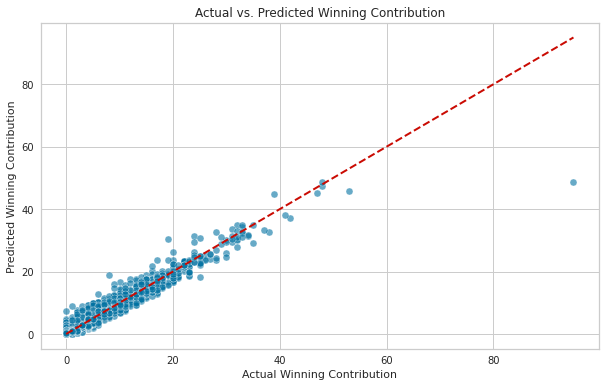

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target variable (y)
features = ['total_goals', 'matches', 'avg_goals', 'home_away_goals_ratio', 'average_goal_minute', 'team_dependence', 'weighted_goal'] + \
           [col for col in players.columns if col.startswith('team_')] + \
           [col for col in players.columns if col.startswith('best_tournament_')]
X = players[features]
y = players['winning_contribution']

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform cross-validation with 5 folds
cv_mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -np.mean(cv_mse_scores)
cv_r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
cv_r2 = np.mean(cv_r2_scores)

print(f'Cross-Validated Mean Squared Error: {cv_mse}')
print(f'Cross-Validated R-squared: {cv_r2}')

# Train the model on the full dataset
model.fit(X, y)

# Make predictions using cross-validation
y_pred = cross_val_predict(model, X, y, cv=5)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the results
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.6, edgecolors='w', linewidth=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Winning Contribution')
plt.ylabel('Predicted Winning Contribution')
plt.title('Actual vs. Predicted Winning Contribution')
plt.show()



### Conclusion

The objective was to predict the winning contribution of a player based on their performance metrics using a Random Forest Regression model with cross-validation. Here are the key findings and reflections on the results:

#### Model Performance
- **Cross-Validated Mean Squared Error (MSE)**: 0.9139175097778706
- **Cross-Validated R-squared (R²)**: 0.9284194694282532
- **Mean Squared Error (MSE)**: 0.9139175097778707
- **R-squared (R²)**: 0.9279234861997144

The high R-squared values indicate that the model explains a substantial portion of the variance in the winning contribution. The low MSE values suggest that the predictions are close to the actual values, demonstrating the accuracy of the model.

#### Reflections on the Question and Choice of Solution
1. **Choice of Model**:
   - The Random Forest Regression model was an appropriate choice given its ability to handle non-linear relationships and interactions between features. The model's high performance metrics validate this choice.
   
2. **Feature Selection**:
   - The inclusion of features such as `total_goals`, `matches`, `avg_goals`, `home_away_goals_ratio`, `average_goal_minute`, `team_dependence`, and `weighted_goal`, along with one-hot encoded categorical variables for `team` and `best_tournament`, provided a comprehensive representation of a player's performance. This contributed to the model's accuracy.
   
3. **Cross-Validation**:
   - Using 5-fold cross-validation provided a robust evaluation of the model's performance, reducing the risk of overfitting and ensuring that the model generalizes well to unseen data.
   
4. **Model Interpretation**:
   - The high R-squared values indicate that player performance metrics are strong predictors of their winning contribution.
### This insight can be valuable for team managers and analysts in evaluating player impact.


In conclusion, the model successfully predicted the winning contribution of players based on their performance metrics.